<a href="https://colab.research.google.com/github/orcacaor/aiffel_quest/blob/main/20251231%20comp_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 요구사항

# - 데이터 이해 및 탐색 : SalePrice와 주요 변수들의 분포를 시각화를 통해서 파악했는가? (완료)
# - 데이터 전처리 과정 : 결측치 및 이상치를 처리하고 스케일링 및 인코딩을 적절히 수행했는가? (완료)
# - 모델 선택 및 비교 : 3개 이상의 모델을 학습시키고 성능 비교했는가? (완료. 무수히 많이 함)
# - 여러 모델을 앙상블을 통해 결합하여 성능을 비교했는가? (완료)
# - Ridge/Lasso 등의 규제 추가, 트리 기반 모델의 깊이/학습률 등을 조정하여 성능 향상을 시도했는가? (완료)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings

warnings.filterwarnings('ignore')

# 모든 열(Column) 출력
pd.set_option('display.max_columns', None)

# 모든 행(Row) 출력
# pd.set_option('display.max_rows', None)

# 행 설정 초기화
# pd.reset_option('display.max_rows')



In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [ ]:
# train.info()

In [ ]:
# train.head()

In [ ]:
train.duplicated().sum()

np.int64(0)

In [ ]:
train.drop(columns='Id', inplace=True)
test.drop(columns='Id', inplace=True)

train.duplicated().sum()

np.int64(0)

In [ ]:
train_check = pd.concat([train.dtypes, train.nunique(), train.isnull().sum(), (train.isnull().sum() / len(train)) * 100], axis=1)
train_check.columns = ['dtype', 'nunique', 'null', 'null_ratio']


# 모든 행(Row) 출력
pd.set_option('display.max_rows', None)

display(train_check.sort_values(by=['dtype', 'nunique'], ascending=True))

# 행 설정 초기화
pd.reset_option('display.max_rows')

dtype  nunique  null  null_ratio
BsmtHalfBath     int64        3     0    0.000000
HalfBath         int64        3     0    0.000000
BsmtFullBath     int64        4     0    0.000000
FullBath         int64        4     0    0.000000
KitchenAbvGr     int64        4     0    0.000000
Fireplaces       int64        4     0    0.000000
GarageCars       int64        5     0    0.000000
YrSold           int64        5     0    0.000000
PoolArea         int64        7     0    0.000000
BedroomAbvGr     int64        8     0    0.000000
OverallCond      int64        9     0    0.000000
OverallQual      int64       10     0    0.000000
TotRmsAbvGrd     int64       12     0    0.000000
MoSold           int64       12     0    0.000000
MSSubClass       int64       15     0    0.000000
LowQualFinSF     int64       17     0    0.000000
3SsnPorch        int64       18     0    0.000000
MiscVal          int64       20     0    0.000000
YearRemodAdd     int64       61     0    0.000000
ScreenPorch      int64       67     0    0.000000
EnclosedPorch    int64      107     0    0.000000
YearBuilt        int64      111     0    0.000000
BsmtFinSF2       int64      112     0    0.000000
OpenPorchSF      int64      186     0    0.000000
WoodDeckSF       int64      239     0    0.000000
2ndFlrSF         int64      346     0    0.000000
GarageArea       int64      399     0    0.000000
BsmtFinSF1       int64      555     0    0.000000
SalePrice        int64      588     0    0.000000
TotalBsmtSF      int64      634     0    0.000000
1stFlrSF         int64      671     0    0.000000
BsmtUnfSF        int64      688     0    0.000000
GrLivArea        int64      755     0    0.000000
LotArea          int64      906     0    0.000000
GarageYrBlt    float64       95    69    5.907534
LotFrontage    float64      104   218   18.664384
MasVnrArea     float64      285     8    0.684932
Street          object        2     0    0.000000
Alley           object        2  1098   94.006849
Utilities       object        2     0    0.000000
CentralAir      object        2     0    0.000000
LandSlope       object        3     0    0.000000
MasVnrType      object        3   694   59.417808
GarageFinish    object        3    69    5.907534
PavedDrive      object        3     0    0.000000
PoolQC          object        3  1162   99.486301
LotShape        object        4     0    0.000000
LandContour     object        4     0    0.000000
ExterQual       object        4     0    0.000000
BsmtQual        object        4    23    1.969178
BsmtCond        object        4    23    1.969178
BsmtExposure    object        4    24    2.054795
KitchenQual     object        4     0    0.000000
GarageCond      object        4    69    5.907534
Fence           object        4   941   80.565068
MiscFeature     object        4  1120   95.890411
MSZoning        object        5     0    0.000000
LotConfig       object        5     0    0.000000
BldgType        object        5     0    0.000000
ExterCond       object        5     0    0.000000
Heating         object        5     0    0.000000
HeatingQC       object        5     0    0.000000
Electrical      object        5     1    0.085616
FireplaceQu     object        5   545   46.660959
GarageQual      object        5    69    5.907534
RoofStyle       object        6     0    0.000000
Foundation      object        6     0    0.000000
BsmtFinType1    object        6    23    1.969178
BsmtFinType2    object        6    24    2.054795
GarageType      object        6    69    5.907534
SaleCondition   object        6     0    0.000000
RoofMatl        object        7     0    0.000000
Functional      object        7     0    0.000000
Condition2      object        8     0    0.000000
HouseStyle      object        8     0    0.000000
Condition1      object        9     0    0.000000
SaleType        object        9     0    0.000000
Exterior1st     object       15     0    0.000000
Exterior2nd     object       16     0    0.000000
Neighborhood    o

In [ ]:
# 타깃 로그 변환 ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

np.float64(1.957766064521197)

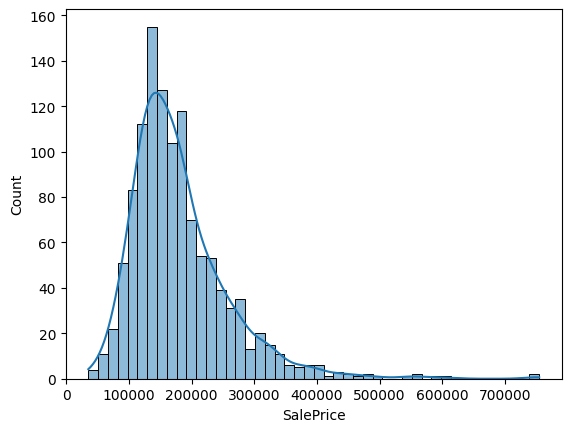

In [ ]:


sns.histplot(train['SalePrice'], kde=True)
train['SalePrice'].skew()


<Axes: xlabel='SalePrice_log', ylabel='Count'>

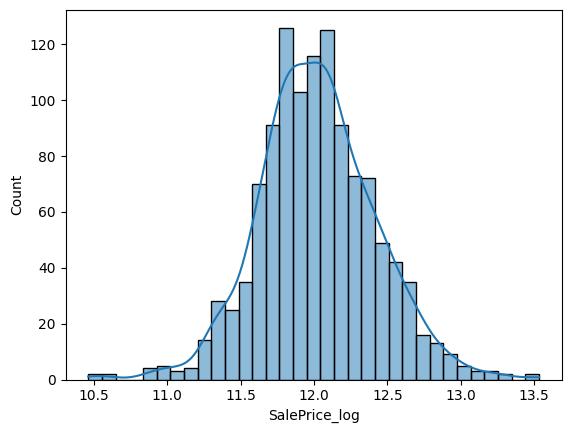

In [ ]:
# 1. 타깃 변수 로그 변환 (np.log1p는 log(1+x)로, 0인 경우에도 안전합니다)
# 실제 훈련 시에는 이 값을 y로 사용하세요.
train['SalePrice_log'] = np.log1p(train['SalePrice'])
train.drop(columns='SalePrice', inplace=True)

sns.histplot(train['SalePrice_log'], kde=True)

In [ ]:
# 이상치 처리 ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

In [ ]:
train.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.00000   950.000000    1168.000000  1168.000000  1168.000000   
mean     56.97774    70.058947   10336.357877     6.105308     5.595890   
std      42.29068    24.762405    8784.854640     1.373032     1.127388   
min      20.00000    21.000000    1300.000000     1.000000     1.000000   
25%      20.00000    59.000000    7560.000000     5.000000     5.000000   
50%      50.00000    69.000000    9446.000000     6.000000     5.000000   
75%      70.00000    80.000000   11601.500000     7.000000     6.000000   
max     190.00000   313.000000  164660.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1168.000000   1168.000000  1160.000000  1168.000000  1168.000000   
mean   1971.201199   1985.021404   102.938793   442.928938    42.537671   
std      30.362445     20.693264   176.142597   462.364719   151.670697   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1966.750000     0.000000     0.000000     0.000000   
50%    1972.500000   1994.000000     0.000000   374.500000     0.000000   
75%    2001.000000   2004.000000   168.000000   714.500000     0.000000   
max    2010.000000   2010.000000  1170.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000   
mean    574.708904  1060.175514  1161.748288   344.853596      5.094178   
std     440.959454   439.223929   392.662227   438.502580     44.876004   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     233.000000   793.000000   880.000000     0.000000      0.000000   
50%     485.500000   990.000000  1077.500000     0.000000      0.000000   
75%     813.250000  1306.000000  1392.500000   728.000000      0.000000   
max    2153.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1168.000000   1168.000000   1168.000000  1168.000000  1168.000000   
mean   1511.696062      0.425514      0.058219     1.562500     0.388699   
std     535.707765      0.518319      0.241463     0.551882     0.506624   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1126.000000      0.000000      0.000000     1.000000     0.000000   
50%    1456.000000      0.000000      0.000000     2.000000     0.000000   
75%    1774.250000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1168.000000   1168.000000   1168.000000  1168.000000  1099.000000   
mean       2.865582      1.047089      6.511130     0.625856  1978.404914   
std        0.824796      0.223722      1.639763     0.654232    24.988391   
min        0.000000      0.000000      2.000000     0.000000  1908.000000   
25%        2.000000      1.000000      5.000000     0.000000  1962.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1168.000000  1168.000000  1168.000000  1168.000000    1168.000000   
mean      1.761130   469.888699    90.971747    47.554795      22.715753   
std       0.746517   213.604836   123.811685    68.250085      63.042971   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   336.000000     0.000000     0.000000       0.000000   
50%       2.000000   477.500000     0.000000    25.500000       0.000000   
75%       2.000000   576.000000   165.000000    68.000000       0.00

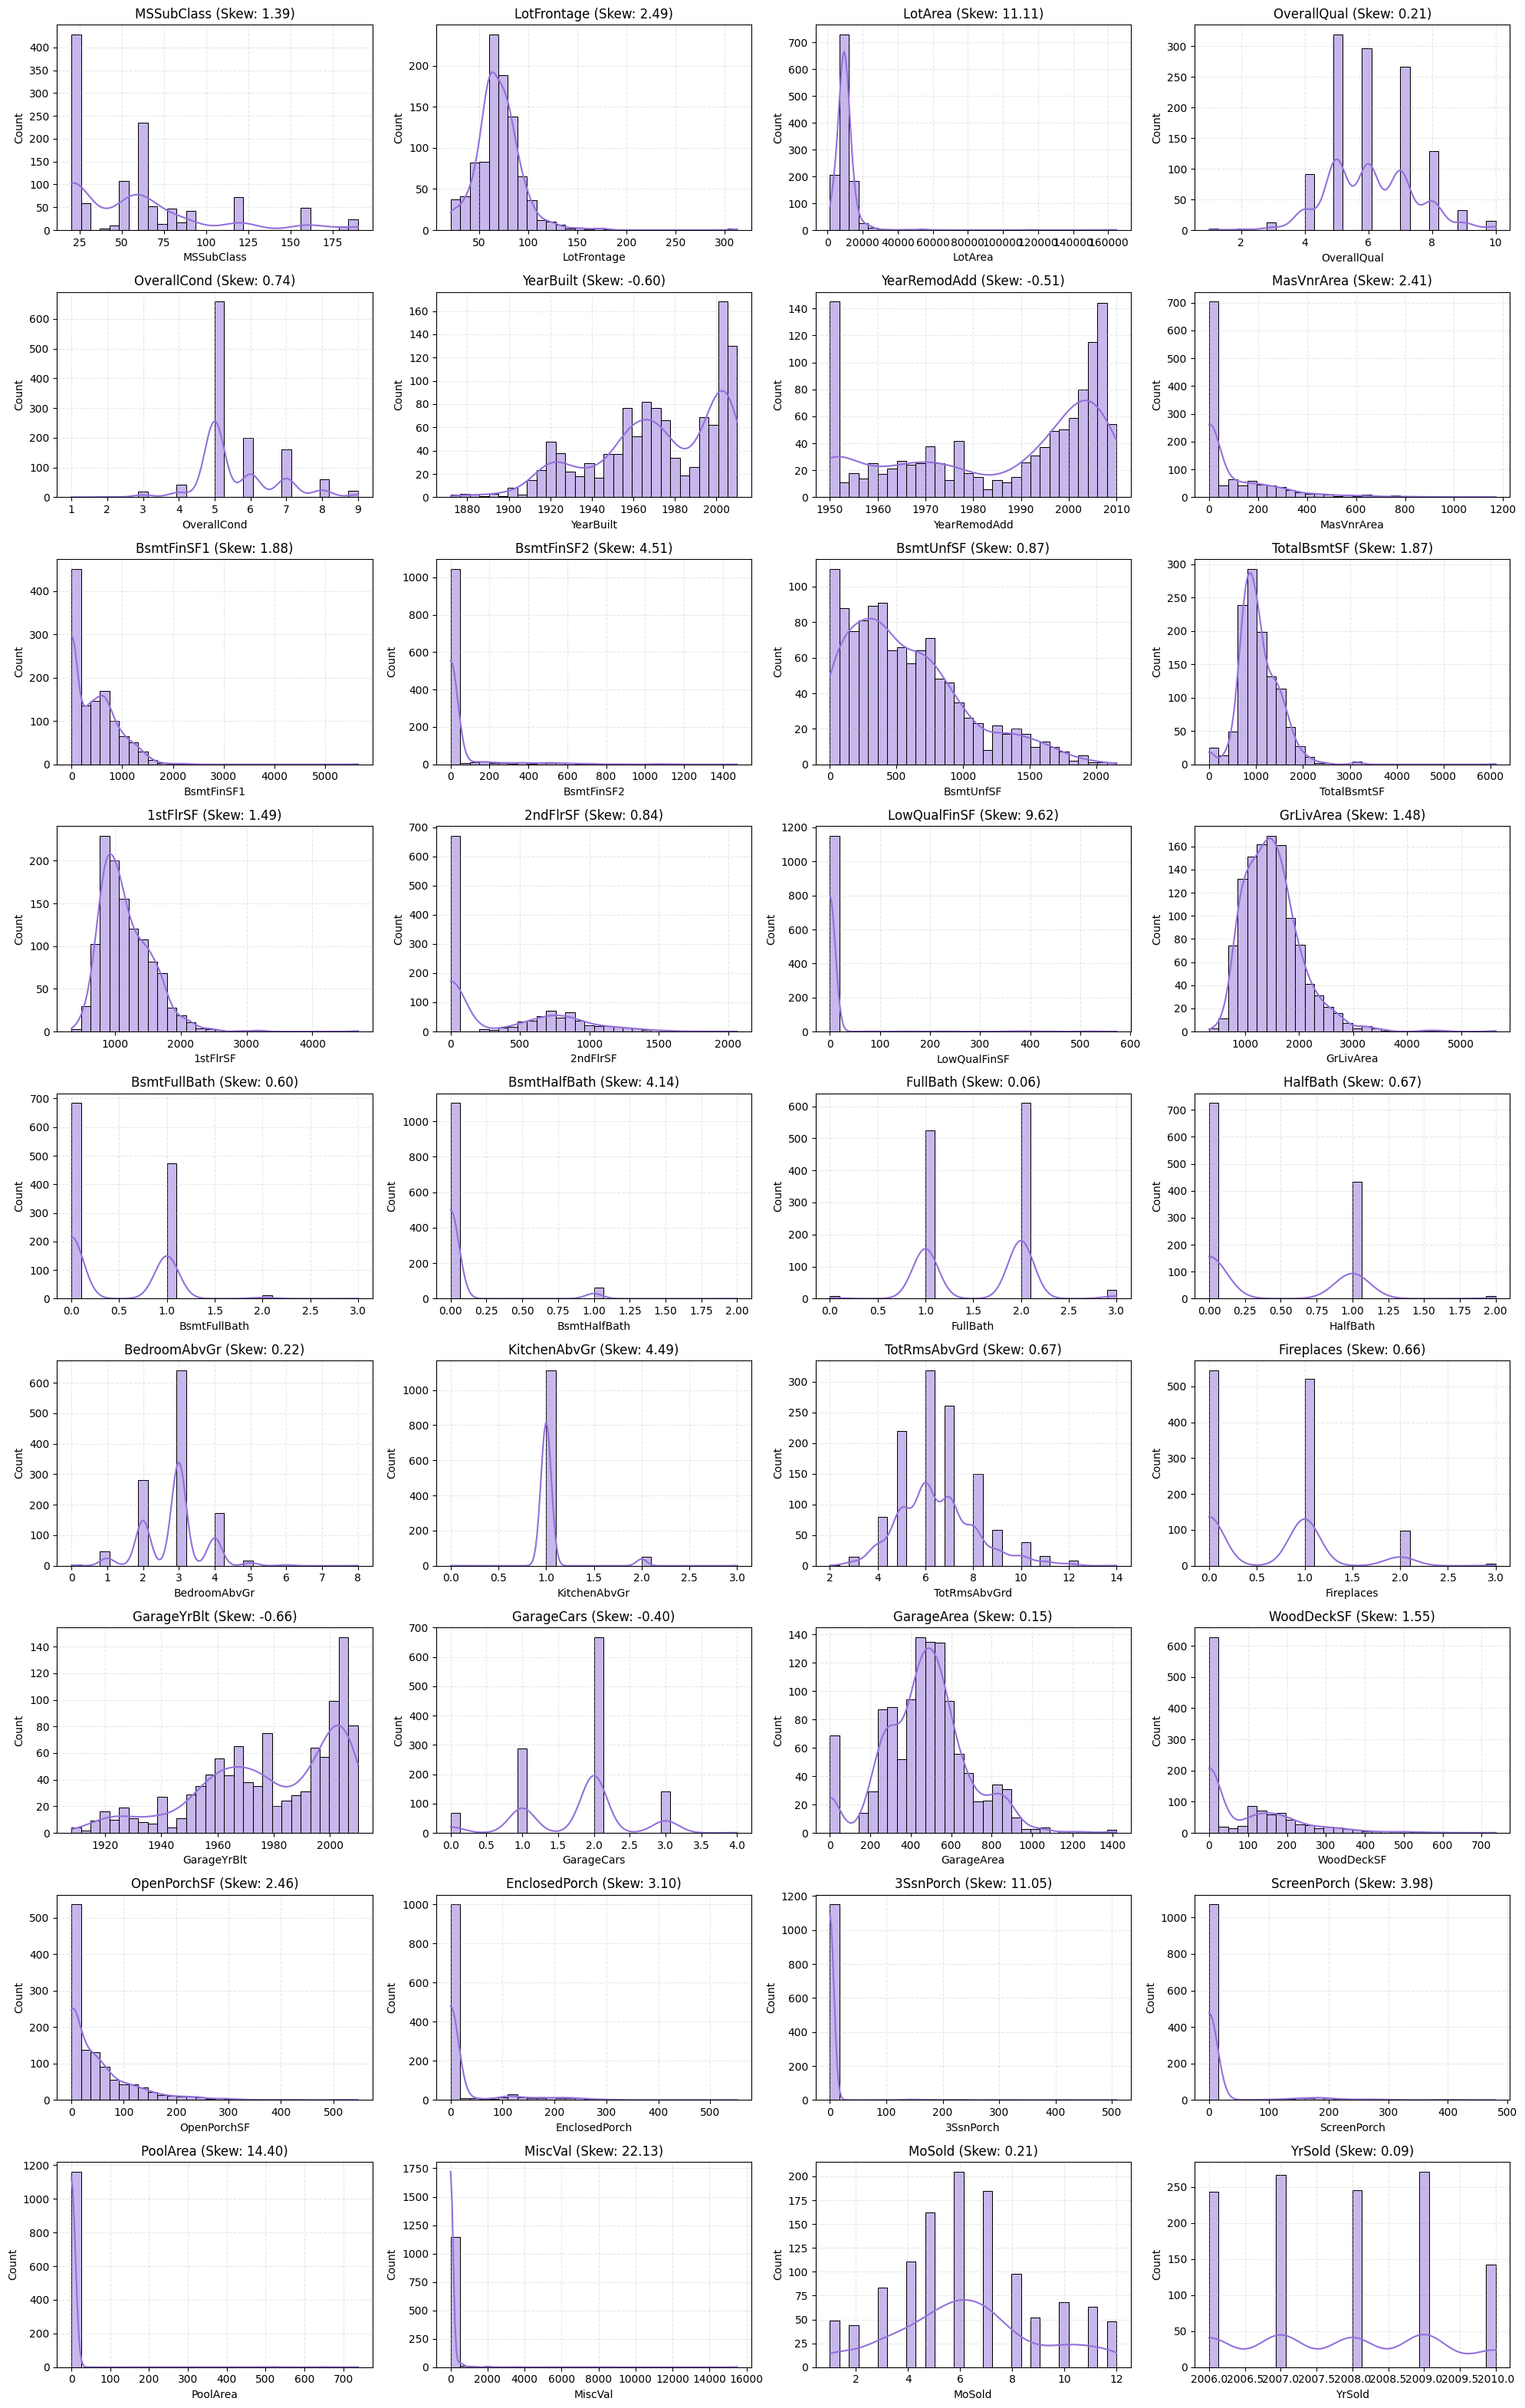

In [ ]:
# 히스토그램


# 1. 수치형 컬럼만 자동 수집 (Id 제외, Target 포함 여부는 선택)
# 보통 타깃(SalePrice)의 분포도 같이 보는 게 좋아서 포함시키는 경우가 많음
numeric_cols = train.select_dtypes(include=['number']).columns
numeric_cols = [col for col in numeric_cols if col not in ['SalePrice_log', 'Id']]

# 2. 서브플롯 그리드 크기 계산
cols_per_row = 4
rows = (len(numeric_cols) - 1) // cols_per_row + 1

# 3. 전체 캔버스 크기 설정
plt.figure(figsize=(20, rows * 3.5))

# 4. 반복문으로 그리기
for i, feature in enumerate(numeric_cols):
    plt.subplot(rows, cols_per_row, i + 1)

    # histplot: 히스토그램 + 밀도 곡선(kde=True)
    sns.histplot(train[feature], kde=True, bins=30, color='mediumpurple', edgecolor='black')

    # 왜도(Skewness) 수치를 제목에 표시하면 더 유용함
    skewness = train[feature].skew()
    plt.title(f'{feature} (Skew: {skewness:.2f})')
    plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
# # 박스플롯


# # 1. 수치형 컬럼만 자동 수집
# numeric_cols = train.select_dtypes(include=['number']).columns
# numeric_cols = [col for col in numeric_cols if col not in ['Id', 'SalePrice', 'SalePrice_log']]

# # 2. 서브플롯 그리드 크기 계산
# cols_per_row = 4
# rows = (len(numeric_cols) - 1) // cols_per_row + 1

# # 3. 전체 캔버스 크기 설정 (박스플롯은 세로 폭이 좁아도 되므로 rows * 3으로 조정)
# plt.figure(figsize=(20, rows * 3))

# # 4. 반복문으로 그리기
# for i, feature in enumerate(numeric_cols):
#     plt.subplot(rows, cols_per_row, i + 1)

#     # boxplot: 단변량 이상치 확인 (가로 방향 추천)
#     sns.boxplot(x=train[feature], color='skyblue')

#     plt.title(f'{feature} Distribution')
#     plt.grid(True, linestyle='--', alpha=0.5)

# plt.tight_layout()
# plt.show()


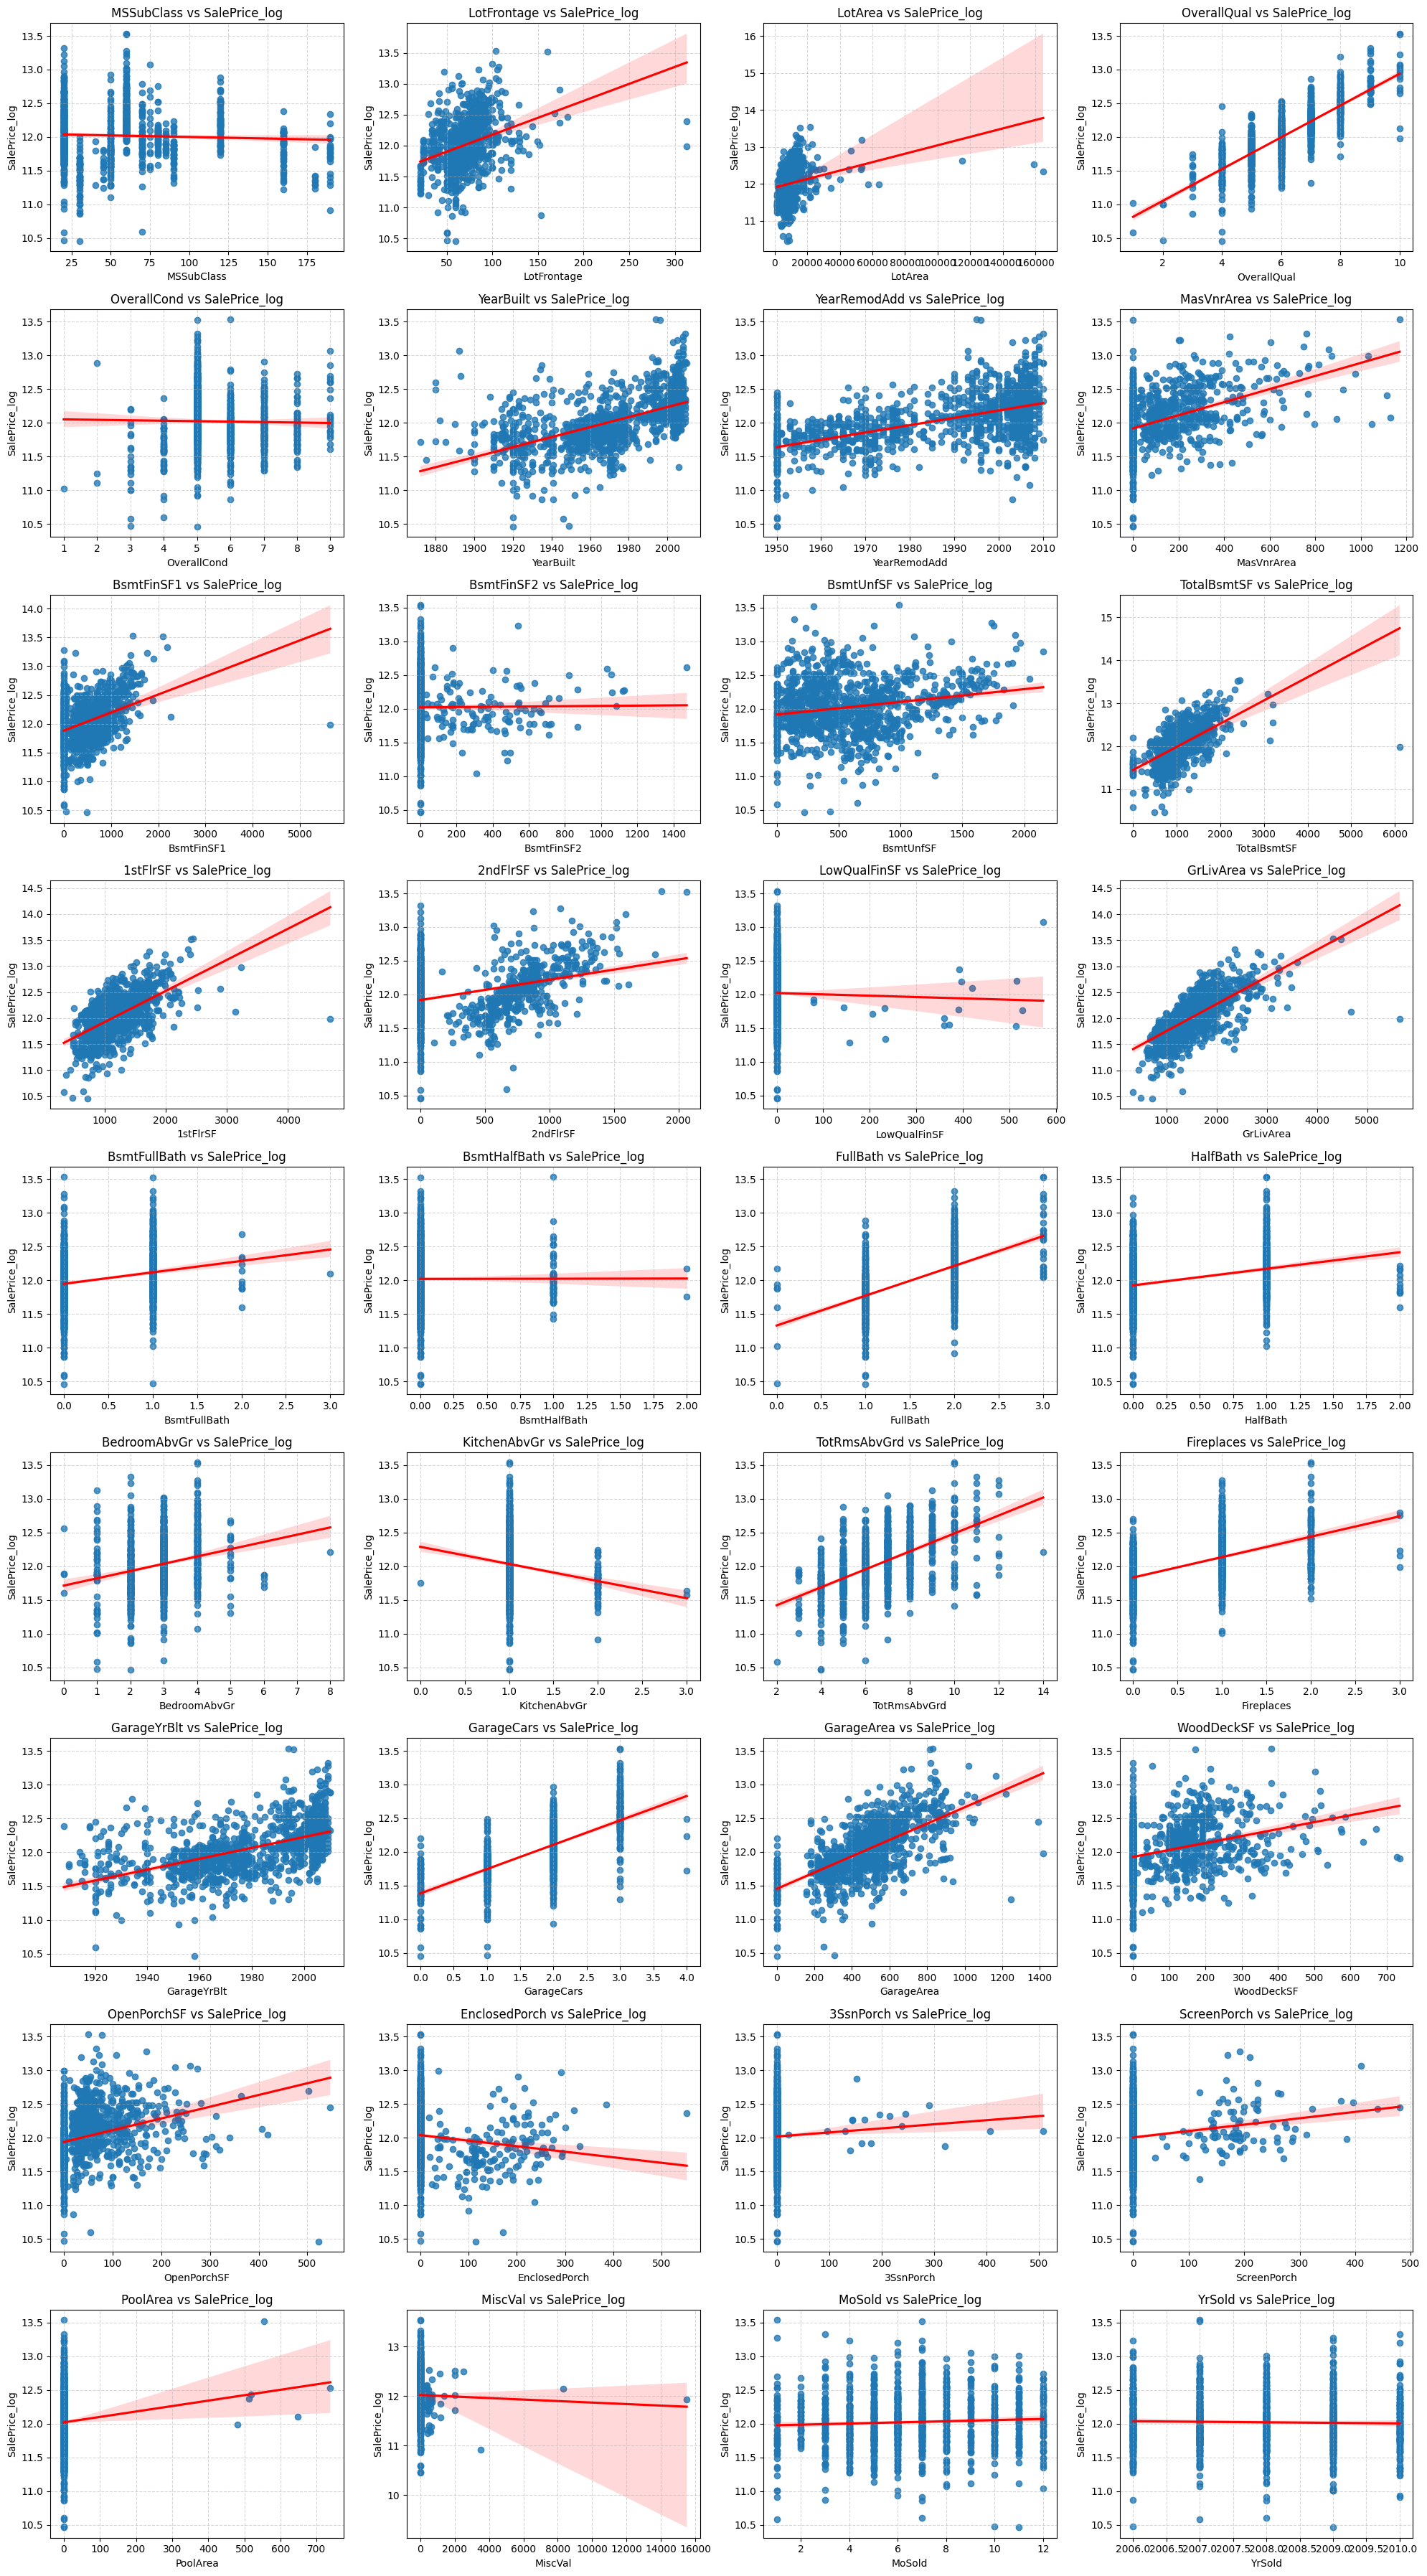

In [ ]:
## 산점도 + 회귀선


# 1. 수치형 컬럼만 자동 수집 (Id와 SalePrice_log 제외)
numeric_cols = train.select_dtypes(include=['number']).columns
numeric_cols = [col for col in numeric_cols if col not in ['Id', 'SalePrice', 'SalePrice_log']]

# 2. 서브플롯 그리드 크기 계산
cols_per_row = 4
rows = (len(numeric_cols) - 1) // cols_per_row + 1

# 3. 전체 캔버스 크기 설정
plt.figure(figsize=(20, rows * 4))

# 4. 반복문으로 그리기
for i, feature in enumerate(numeric_cols):
    plt.subplot(rows, cols_per_row, i + 1)

    # regplot: 산점도 + 선형 회귀선
    sns.regplot(
        data=train,
        x=feature,
        y='SalePrice_log',
        # scatter_kws={'alpha': 0.3, 's': 10}, # 점: 투명도 0.3, 크기 10
        line_kws={'color': 'red'}            # 선: 빨간색
    )

    plt.title(f'{feature} vs SalePrice_log')
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [ ]:
# 1. [오타 수정] GarageYrBlt 2207 -> 2007
# train.loc[train['GarageYrBlt'] == 2207, 'GarageYrBlt'] = 2007 # 그런값 없음
# train['GarageYrBlt'].max()

# 2. [필수 삭제] GrLivArea: 크기는 큰데(4000 이상) 가격은 싼(로그 12.5 미만) 매물
# (주의: 로그 변환된 SalePrice_log 기준입니다. 원본 가격이면 300,000 미만)
# 그래프를 보니 SalePrice_log < 12.5 정도로 보입니다.
outlier_grliv = train[(train['GrLivArea'] > 4000) & (train['SalePrice_log'] < 12.5)].index
train = train.drop(outlier_grliv)

# 3. [필수 삭제] 지하실이 비정상적으로 큰 경우
train = train.drop(train[train['TotalBsmtSF'] > 6000].index)

# 4. [필수 삭제] 1층 면적이 비정상적으로 큰 경우
train = train.drop(train[train['1stFlrSF'] > 4000].index)

# 5. [삭제 권장] LotFrontage (300 초과)
train = train.drop(train[train['LotFrontage'] > 300].index)

# 6. [삭제 권장] LotArea (100,000 초과)
train = train.drop(train[train['LotArea'] > 100000].index)

# 7. [삭제 권장] MasVnrArea (1,500 초과)
# train = train.drop(train[train['MasVnrArea'] > 1500].index) # 그런값 없음
# train['MasVnrArea'].max()

# 8. [삭제 권장] EnclosedPorch (500 초과)
# train = train.drop(train[train['EnclosedPorch'] > 500].index) # 놔두는게 RMSE 더 낮음;;;;;;;;;

# 인덱스 초기화 (중요)
train = train.reset_index(drop=True)

print("이상치 처리 및 오타 수정 완료.")

이상치 처리 및 오타 수정 완료.


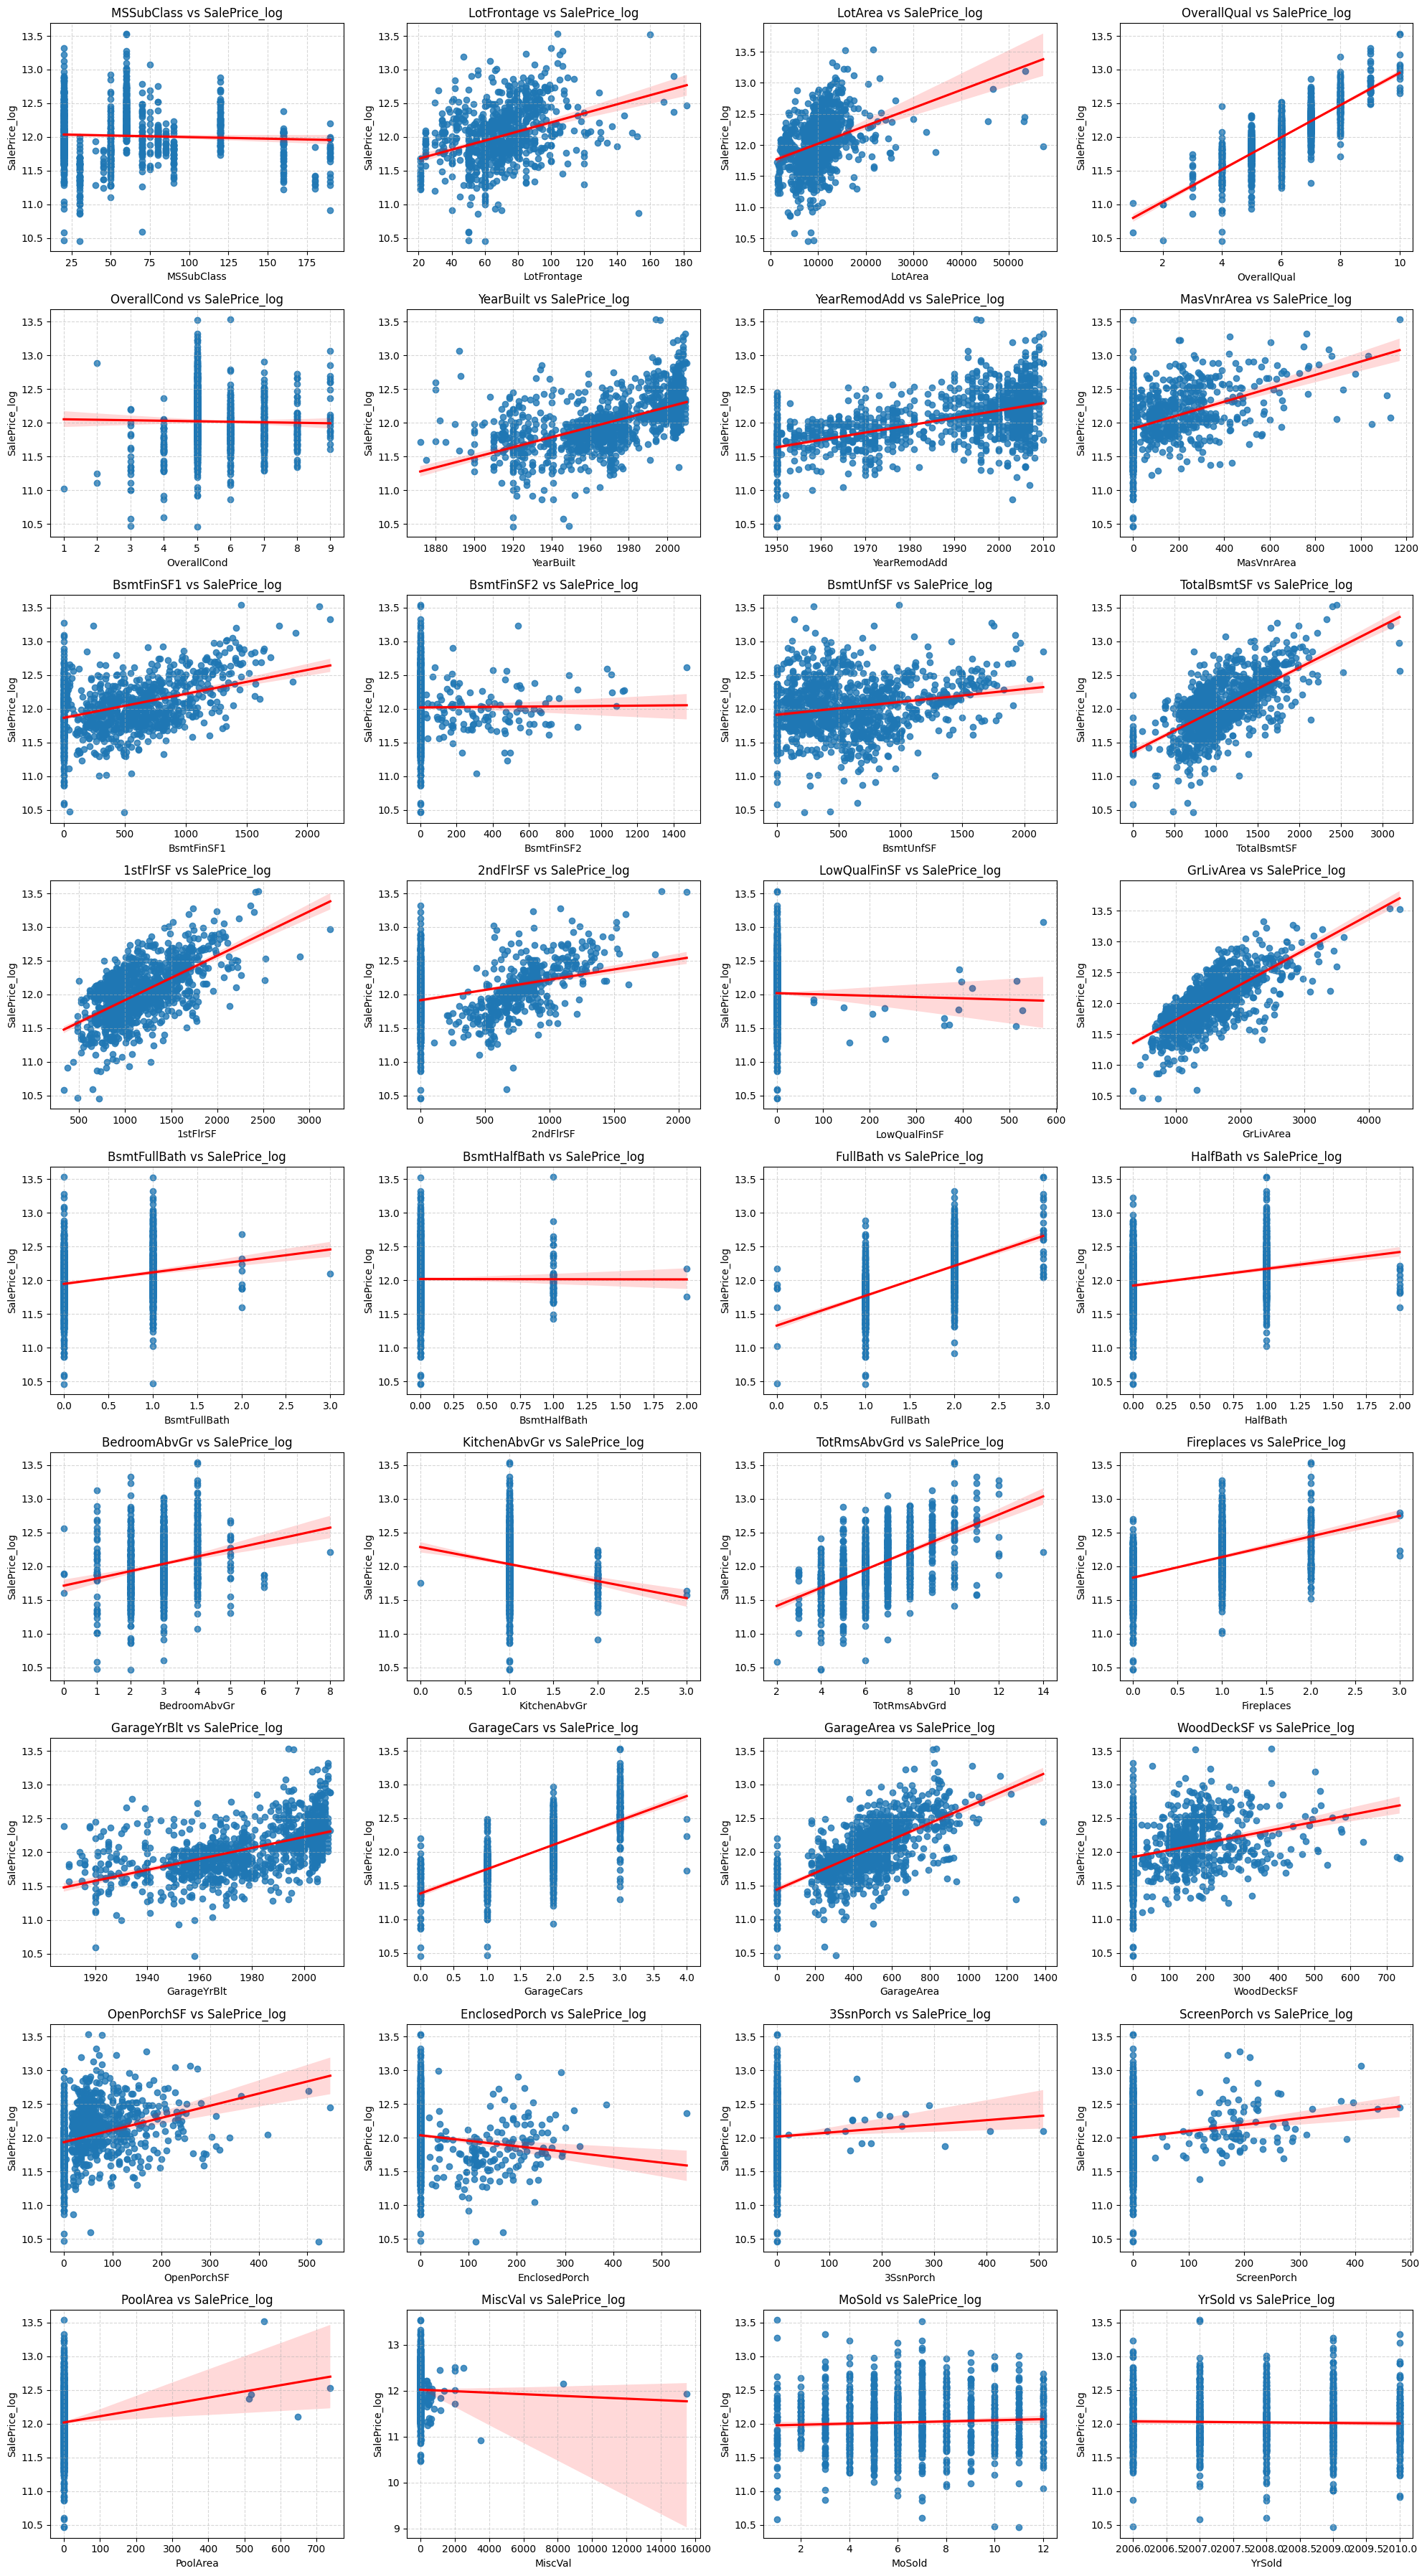

In [ ]:
## 산점도 + 회귀선


# 1. 수치형 컬럼만 자동 수집 (Id와 SalePrice_log 제외)
numeric_cols = train.select_dtypes(include=['number']).columns
numeric_cols = [col for col in numeric_cols if col not in ['Id', 'SalePrice', 'SalePrice_log']]

# 2. 서브플롯 그리드 크기 계산
cols_per_row = 4
rows = (len(numeric_cols) - 1) // cols_per_row + 1

# 3. 전체 캔버스 크기 설정
plt.figure(figsize=(20, rows * 4))

# 4. 반복문으로 그리기
for i, feature in enumerate(numeric_cols):
    plt.subplot(rows, cols_per_row, i + 1)

    # regplot: 산점도 + 선형 회귀선
    sns.regplot(
        data=train,
        x=feature,
        y='SalePrice_log',
        # scatter_kws={'alpha': 0.3, 's': 10}, # 점: 투명도 0.3, 크기 10
        line_kws={'color': 'red'}            # 선: 빨간색
    )

    plt.title(f'{feature} vs SalePrice_log')
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [ ]:
# 수치형인데 의미는 범주형 ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

In [ ]:
# 조회

train[['MSSubClass', 'MoSold', 'YrSold']].head(20)

MSSubClass  MoSold  YrSold
0           20       7    2008
1           90       3    2009
2           20       7    2006
3           20      12    2007
4           50       7    2007
5          120       8    2007
6           50      10    2006
7           60      10    2009
8           20       5    2009
9           60       8    2008
10         120       6    2009
11          20       6    2008
12          80       5    2009
13          20      12    2009
14          20       9    2008
15          20       6    2007
16          20       1    2009
17         160       6    2006
18          75       7    2009
19          70       4    2009

In [ ]:
# 범주형으로 취급할 수치형 변수들 -> 문자열(Object)로 변환
cols_to_cat = ['MSSubClass', 'MoSold', 'YrSold']

for c in cols_to_cat:
    train[c] = train[c].astype(str)
    test[c]  = test[c].astype(str)

# 실제 데이터형(dtype)을 추출하여 출력
print("--- 변환 완료 후 데이터 타입 확인 ---")
print(train[cols_to_cat].dtypes)

--- 변환 완료 후 데이터 타입 확인 ---
MSSubClass    object
MoSold        object
YrSold        object
dtype: object


In [ ]:
# 결측치 처리 ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

In [ ]:
# 모든 행(Row) 출력
pd.set_option('display.max_rows', None)

print('train 결측 비율')
display(((train.isnull().sum() / len(train)) * 100).sort_values(ascending=False))
print('test 결측 비율')
display(((test.isnull().sum() / len(train)) * 100).sort_values(ascending=False))

# 행 설정 초기화
pd.reset_option('display.max_rows')


train 결측 비율


PoolQC           99.569707
MiscFeature      96.041308
Alley            93.975904
Fence            80.464716
MasVnrType       59.552496
FireplaceQu      46.901893
LotFrontage      18.502582
GarageYrBlt       5.938038
GarageCond        5.938038
GarageType        5.938038
GarageFinish      5.938038
GarageQual        5.938038
BsmtExposure      2.065404
BsmtFinType2      2.065404
BsmtCond          1.979346
BsmtQual          1.979346
BsmtFinType1      1.979346
MasVnrArea        0.688468
Electrical        0.086059
MSSubClass        0.000000
Fireplaces        0.000000
Functional        0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
TotRmsAbvGrd      0.000000
GarageCars        0.000000
GrLivArea         0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
S

test 결측 비율


PoolQC           25.043029
MiscFeature      24.612737
Alley            23.321859
Fence            20.481928
MasVnrType       15.318417
FireplaceQu      12.478485
LotFrontage       3.528399
BsmtExposure      1.204819
BsmtQual          1.204819
BsmtCond          1.204819
BsmtFinType2      1.204819
BsmtFinType1      1.204819
GarageYrBlt       1.032702
GarageFinish      1.032702
GarageType        1.032702
GarageQual        1.032702
GarageCond        1.032702
MSSubClass        0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
BsmtFullBath      0.000000
KitchenQual       0.000000
GarageCars        0.000000
Fireplaces        0.000000
LowQualFinSF      0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
P

In [ ]:
train_check = pd.concat([train.dtypes, train.nunique(), train.isnull().sum(), (train.isnull().sum() / len(train)) * 100], axis=1)
train_check.columns = ['dtype', 'nunique', 'null', 'null_ratio']


# 모든 행(Row) 출력
pd.set_option('display.max_rows', None)

display(train_check.sort_values(by=['dtype', 'null_ratio'], ascending=False))

# 행 설정 초기화
pd.reset_option('display.max_rows')

dtype  nunique  null  null_ratio
PoolQC          object        3  1157   99.569707
MiscFeature     object        4  1116   96.041308
Alley           object        2  1092   93.975904
Fence           object        4   935   80.464716
MasVnrType      object        3   692   59.552496
FireplaceQu     object        5   545   46.901893
GarageType      object        6    69    5.938038
GarageFinish    object        3    69    5.938038
GarageQual      object        5    69    5.938038
GarageCond      object        4    69    5.938038
BsmtExposure    object        4    24    2.065404
BsmtFinType2    object        6    24    2.065404
BsmtQual        object        4    23    1.979346
BsmtCond        object        4    23    1.979346
BsmtFinType1    object        6    23    1.979346
Electrical      object        5     1    0.086059
MSSubClass      object       15     0    0.000000
MSZoning        object        5     0    0.000000
Street          object        2     0    0.000000
LotShape        object        4     0    0.000000
LandContour     object        4     0    0.000000
Utilities       object        2     0    0.000000
LotConfig       object        5     0    0.000000
LandSlope       object        3     0    0.000000
Neighborhood    object       25     0    0.000000
Condition1      object        9     0    0.000000
Condition2      object        8     0    0.000000
BldgType        object        5     0    0.000000
HouseStyle      object        8     0    0.000000
RoofStyle       object        6     0    0.000000
RoofMatl        object        6     0    0.000000
Exterior1st     object       15     0    0.000000
Exterior2nd     object       16     0    0.000000
ExterQual       object        4     0    0.000000
ExterCond       object        5     0    0.000000
Foundation      object        6     0    0.000000
Heating         object        5     0    0.000000
HeatingQC       object        5     0    0.000000
CentralAir      object        2     0    0.000000
KitchenQual     object        4     0    0.000000
Functional      object        7     0    0.000000
PavedDrive      object        3     0    0.000000
MoSold          object       12     0    0.000000
YrSold          object        5     0    0.000000
SaleType        object        9     0    0.000000
SaleCondition   object        6     0    0.000000
LotFrontage    float64      103   215   18.502582
GarageYrBlt    float64       95    69    5.938038
MasVnrArea     float64      283     8    0.688468
SalePrice_log  float64      585     0    0.000000
LotArea          int64      900     0    0.000000
OverallQual      int64       10     0    0.000000
OverallCond      int64        9     0    0.000000
YearBuilt        int64      111     0    0.000000
YearRemodAdd     int64       61     0    0.000000
BsmtFinSF1       int64      553     0    0.000000
BsmtFinSF2       int64      112     0    0.000000
BsmtUnfSF        int64      687     0    0.000000
TotalBsmtSF      int64      629     0    0.000000
1stFlrSF         int64      666     0    0.000000
2ndFlrSF         int64      342     0    0.000000
LowQualFinSF     int64       17     0    0.000000
GrLivArea        int64      751     0    0.000000
BsmtFullBath     int64        4     0    0.000000
BsmtHalfBath     int64        3     0    0.000000
FullBath         int64        4     0    0.000000
HalfBath         int64        3     0    0.000000
BedroomAbvGr     int64        8     0    0.000000
KitchenAbvGr     int64        4     0    0.000000
TotRmsAbvGrd     int64       12     0    0.000000
Fireplaces       int64        4     0    0.000000
GarageCars       int64        5     0    0.000000
GarageArea       int64      397     0    0.000000
WoodDeckSF       int64      237     0    0.000000
OpenPorchSF      int64      184     0    0.000000
EnclosedPorch    int64      107     0    0.000000
3SsnPorch        int64       18     0    0.000000
ScreenPorch      int64       67     0    0.000000
PoolArea         int64        6     0    0.000000
MiscVal          

In [ ]:
# 1. "NA = 시설 없음" (의미 있는 결측)
# 가장 많은 컬럼이 여기에 해당합니다. 데이터 설명서를 보면 NA는 데이터가 빈 게 아니라 **"집에 그 시설이 없다"**는 뜻입니다.

# 해당 컬럼:
# PoolQC (수영장 없음)
# MiscFeature (기타 시설 없음)
# Alley (골목 접근로 없음)
# Fence (울타리 없음)
# FireplaceQu (벽난로 없음)
# Garage 그룹: GarageType, GarageFinish, GarageQual, GarageCond (차고 없음)
# Basement 그룹: BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 (지하실 없음)
# 🔴 상위권 처리 방법:
# 범주형: NaN을 'None' 이라는 새로운 문자열 범주로 채웁니다. (모델이 '없음'이라는 정보를 학습할 수 있게 함)
# 수치형 매핑 시: 앞서 논의한 Target Encoding이나 순서형 매핑을 할 때, 'None'을 0으로 매핑합니다.

cols_fill_none = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'MasVnrType' # 벽돌 마감이 없으면 None
]

for col in cols_fill_none:
    train[col] = train[col].fillna('None')
    test[col] = test[col].fillna('None')

In [ ]:
# 2. LotFrontage (도로와 맞닿은 거리)
# 상태: 약 18% 결측. 집이 도로와 맞닿은 선의 길이입니다.
# 특징: 물리적으로 이 값이 없을 수는 없습니다. 진짜로 누락된 데이터입니다.
# 🔴 상위권 처리 방법:
# 단순 평균/중앙값으로 채우지 않습니다.
# **"같은 동네(Neighborhood)의 집들은 대지 형태가 비슷할 것이다"**라는 가정을 사용합니다.
# Neighborhood별로 그룹화하여 해당 동네의 LotFrontage **중앙값(Median)**으로 채웁니다.

# Neighborhood별 LotFrontage의 중앙값으로 결측치 채우기
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

# ---------------------------------------------------------
# 1. LotFrontage 처리 (Train의 동네별 중앙값 기준)
# ---------------------------------------------------------
# (1) Train 데이터에서 '동네별 LotFrontage 중앙값'을 미리 계산하여 딕셔너리(Map)로 만듭니다.
lotfrontage_map = train.groupby('Neighborhood')['LotFrontage'].median()

# (2) Test 데이터의 Neighborhood에 맞춰서 매핑된 중앙값을 채웁니다.
test['LotFrontage'] = test['LotFrontage'].fillna(test['Neighborhood'].map(lotfrontage_map))

# (혹시나 Test에만 있는 새로운 동네가 있어서 여전히 결측치인 경우를 대비해, 전체 중앙값으로 한 번 더 땜빵)
test['LotFrontage'] = test['LotFrontage'].fillna(train['LotFrontage'].median())

In [ ]:
# 3. GarageYrBlt (차고 건축 연도)
# 상태: 약 5.9% 결측. 차고가 없는 집들입니다.
# 문제점: 수치형 변수인데 'None'으로 채울 수 없습니다. 0으로 채우자니 연도 데이터라 왜곡(2000년과 0년의 차이)이 너무 큽니다.
# 🔴 상위권 처리 방법 (택 1):
# 0으로 채우기: 트리 모델(XGBoost 등)을 쓴다면 0으로 둬도 "아, 아주 옛날이거나 없구나"라고 분기 처리하므로 괜찮습니다.
# 집 건축 연도(YearBuilt)로 채우기: "차고는 보통 집 지을 때 같이 짓는다"는 가정하에, 결측치를 해당 행의 YearBuilt 값으로 채웁니다. (회귀 모델을 쓸 때 더 안전함)
# 삭제: YearBuilt와 상관관계가 너무 높아서(다중공선성), 그냥 컬럼을 날려버리는 경우도 많습니다.

# 방법 1: 0으로 채우기 (트리 모델용)
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(0)
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(0)

In [ ]:
# 이거 안하고 아래에서 따로 처리함!!!

# 4. MasVnr (벽돌 마감) 그룹
# 해당 컬럼: MasVnrType (타입), MasVnrArea (면적)
# 특징: MasVnrType이 NaN이면 MasVnrArea도 NaN이어야 합니다. 즉, 벽돌 마감이 없는 집입니다.
# 🔴 상위권 처리 방법:
# MasVnrType: **'None'**으로 채웁니다.
# MasVnrArea: **0.0**으로 채웁니다.
# (참고: 사용자님의 데이터를 보면 MasVnrType 결측이 59%로 비정상적으로 높습니다. 원본 Ames 데이터는 약 0.5%입니다. 혹시 데이터 로드나 전처리 과정에서 오류가 없는지, 혹은 특정 조건으로 필터링된 데이터인지 확인이 필요합니다. 만약 데이터가 맞다면, 위 규칙대로 None/0 처리가 맞습니다.)

# code
# Python
# train['MasVnrType'] = train['MasVnrType'].fillna('None')
# train['MasVnrArea'] = train['MasVnrArea'].fillna(0)

# 이거 안하고 아래에서 따로 처리함!!!

In [ ]:
# 5. Electrical (전기 시설)
# 상태: 1개 결측 (극소수).
# 특징: 집인데 전기가 없을 확률은 낮습니다. 단순 누락입니다.
# 🔴 상위권 처리 방법:
# **최빈값(Mode)**으로 채웁니다. 이 데이터셋의 대부분은 SBrkr (Standard Circuit Breakers)입니다.
# code
# Python
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

# ---------------------------------------------------------
# 2. Electrical 처리 (Train의 최빈값 기준)
# ---------------------------------------------------------
# Train에서 구했던 최빈값을 변수에 저장해서 사용하거나, 직접 참조합니다.
train_electrical_mode = train['Electrical'].mode()[0]

test['Electrical'] = test['Electrical'].fillna(train_electrical_mode)

print("Test 결측치 처리 완료")

Test 결측치 처리 완료


In [ ]:
train[['MasVnrType', 'MasVnrArea']]

MasVnrType  MasVnrArea
0       BrkFace       151.0
1          None         0.0
2       BrkFace        72.0
3       BrkFace       254.0
4          None         0.0
...         ...         ...
1157       None         0.0
1158       None         0.0
1159    BrkFace       479.0
1160    BrkFace       472.0
1161       None         0.0

[1162 rows x 2 columns]

In [ ]:
# 1. MasVnrArea(면적) 결측치는 0으로 먼저 채웁니다.
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)

# 2. [논리 1] 면적이 0인데 타입이 NaN인 경우 -> 'None'으로 채움
# (벽돌이 없으니 타입도 없음)
mask_no_area = (train['MasVnrArea'] == 0) & (train['MasVnrType'].isna())
train.loc[mask_no_area, 'MasVnrType'] = 'None'

# 3. [논리 2] 면적이 0보다 큰데(존재하는데) 타입이 NaN인 경우 -> '최빈값'으로 채움
# (None을 제외한 재질 중 가장 많이 쓰이는 것, 보통 BrkFace가 나옵니다)
# 최빈값 구하기 (None 제외)
most_freq_masvnr = train.loc[train['MasVnrType'] != 'None', 'MasVnrType'].mode()[0]

# 나머지 결측치(면적은 있는데 타입이 빈 것들)를 최빈값으로 채움
train['MasVnrType'] = train['MasVnrType'].fillna(most_freq_masvnr)

# 확인용 출력
print(f"채워진 최빈값 재질: {most_freq_masvnr}")
print(train[['MasVnrType', 'MasVnrArea']].isnull().sum())

채워진 최빈값 재질: BrkFace
MasVnrType    0
MasVnrArea    0
dtype: int64


In [ ]:
# 1. Test 데이터의 MasVnrArea 결측치도 0으로 채움 (Train과 동일한 기준)
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)

# 2. [논리 1] 면적이 0인데 타입이 NaN인 경우 -> 'None'으로 채움
mask_no_area_test = (test['MasVnrArea'] == 0) & (test['MasVnrType'].isna())
test.loc[mask_no_area_test, 'MasVnrType'] = 'None'

# 3. [논리 2] 나머지 결측치(면적 > 0 이지만 타입이 빈 경우)
# ★중요★: 여기서 최빈값을 다시 구하지 않고, Train에서 구했던 'most_freq_masvnr' 변수를 그대로 씁니다.
test['MasVnrType'] = test['MasVnrType'].fillna(most_freq_masvnr)

# 확인용 출력
print("Test 데이터 MasVnr 처리 완료")
print(test[['MasVnrType', 'MasVnrArea']].isnull().sum())

Test 데이터 MasVnr 처리 완료
MasVnrType    0
MasVnrArea    0
dtype: int64


In [ ]:
# 모든 행(Row) 출력
pd.set_option('display.max_rows', None)

print('train 결측 비율')
display(((train.isnull().sum() / len(train)) * 100).sort_values(ascending=False))
print('test 결측 비율')
display(((test.isnull().sum() / len(train)) * 100).sort_values(ascending=False))

# 행 설정 초기화
pd.reset_option('display.max_rows')


train 결측 비율


MSSubClass       0.0
MSZoning         0.0
GarageYrBlt      0.0
GarageType       0.0
FireplaceQu      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
PoolQC           0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
MiscFeature      0.0
Fence            0.0
PoolArea         0.0
GarageQual       0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
PavedDrive       0.0
GarageCond       0.0
Electrical       0.0
CentralAir       0.0
HeatingQC        0.0
LandSlope        0.0
OverallCond      0.0
OverallQual      0.0
HouseStyle       0.0
BldgType         0.0
Condition2   

test 결측 비율


MSSubClass       0.0
BedroomAbvGr     0.0
GarageType       0.0
FireplaceQu      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
HalfBath         0.0
GarageFinish     0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
GarageYrBlt      0.0
GarageCars       0.0
CentralAir       0.0
PoolArea         0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
MiscFeature      0.0
Fence            0.0
PoolQC           0.0
ScreenPorch      0.0
GarageArea       0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
PavedDrive       0.0
GarageCond       0.0
GarageQual       0.0
Electrical       0.0
HeatingQC        0.0
MSZoning         0.0
LandSlope        0.0
OverallCond      0.0
OverallQual      0.0
HouseStyle       0.0
BldgType         0.0
Condition2       0.0
Condition1   

In [ ]:
# 범주형 -> 수치형 ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

In [ ]:
def map_ordinal_features(df):
    df = df.copy()

    # 1. 일반적인 품질 평가 (Ex -> 5 ~ Po -> 1, None -> 0)
    # NA나 None은 이미 전처리 단계에서 'None' 문자열로 채워졌다고 가정
    qual_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0, 'NA': 0}

    qual_cols = [
        'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
        'HeatingQC', 'KitchenQual', 'FireplaceQu',
        'GarageQual', 'GarageCond', 'PoolQC'
    ]

    for col in qual_cols:
        # 혹시 모를 결측치는 'None'으로 간주하고 0 처리 (map은 없는 키값은 NaN 반환하므로 주의)
        # 따라서 안전하게 replace나 map 후 fillna(0) 사용
        if col in df.columns:
            df[col] = df[col].map(qual_map).fillna(0).astype(int)

    # 2. 지하실 노출 (Gd > Av > Mn > No > None)
    bsmt_exposure_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0, 'NA': 0}
    if 'BsmtExposure' in df.columns:
        df['BsmtExposure'] = df['BsmtExposure'].map(bsmt_exposure_map).fillna(0).astype(int)

    # 3. 지하실 마감 (GLQ > ... > Unf > None)
    bsmt_fin_map = {
        'GLQ': 6, 'ALQ': 5, 'BLQ': 4,
        'Rec': 3, 'LwQ': 2, 'Unf': 1,
        'None': 0, 'NA': 0
    }
    if 'BsmtFinType1' in df.columns:
        df['BsmtFinType1'] = df['BsmtFinType1'].map(bsmt_fin_map).fillna(0).astype(int)
    if 'BsmtFinType2' in df.columns:
        df['BsmtFinType2'] = df['BsmtFinType2'].map(bsmt_fin_map).fillna(0).astype(int)

    # 4. 기능성 (Typ > ... > Sal)
    functional_map = {
        'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4,
        'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0,
        'None': 0 # Functional은 보통 결측이 없지만 안전장치
    }
    if 'Functional' in df.columns:
        df['Functional'] = df['Functional'].map(functional_map).fillna(7).astype(int) # 결측은 보통 Typ(7)로 채움

    # 5. 차고 마감 (Fin > RFn > Unf > None)
    garage_fin_map = {'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0, 'NA': 0}
    if 'GarageFinish' in df.columns:
        df['GarageFinish'] = df['GarageFinish'].map(garage_fin_map).fillna(0).astype(int)

    # 6. 진입로 포장 (Y > P > N)
    pave_map = {'Y': 2, 'P': 1, 'N': 0}
    if 'PavedDrive' in df.columns:
        df['PavedDrive'] = df['PavedDrive'].map(pave_map).fillna(0).astype(int)

    # 7. 울타리 (Good Privacy > ... > No Fence) - 선택사항이나 하는 게 좋음
    fence_map = {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'None': 0, 'NA': 0}
    if 'Fence' in df.columns:
        df['Fence'] = df['Fence'].map(fence_map).fillna(0).astype(int)

    return df

# --- 실행 ---
train = map_ordinal_features(train)
test = map_ordinal_features(test)

print("순서형 변수 수치 매핑 완료!")
# 확인
print(train[['ExterQual', 'BsmtQual', 'KitchenQual']].head())

순서형 변수 수치 매핑 완료!
   ExterQual  BsmtQual  KitchenQual
0          3         3            3
1          3         4            3
2          3         4            4
3          5         5            4
4          3         3            3


In [ ]:
# 피처 엔지니어링ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

In [ ]:

def add_derived_features(df):
    """
    단일 데이터프레임(df)을 입력받아 파생 변수를 추가하고 반환하는 함수
    (train과 test를 합치지 않고 개별 적용, fillna(0) 강제 적용 없음)
    """
    df = df.copy() # 원본 데이터 보존

    # ====================================================
    # 🏠 1. 공간(Area) 관련 파생 변수
    # ====================================================
    # TotalSF는 원본 코드에서도 각각 fillna(0)을 하고 더했으므로 유지
    df['TotalSF'] = (df['TotalBsmtSF'].fillna(0) +
                     df['1stFlrSF'].fillna(0) +
                     df['2ndFlrSF'].fillna(0))

    df['Total_Home_Quality'] = df['OverallQual'] + df['OverallCond']

    # ====================================================
    # 🛁 2. 욕실(Bathroom) 통합
    # ====================================================
    df['Total_Bathrooms'] = (df['FullBath'].fillna(0) +
                             (0.5 * df['HalfBath'].fillna(0)) +
                             df['BsmtFullBath'].fillna(0) +
                             (0.5 * df['BsmtHalfBath'].fillna(0)))

    # ====================================================
    # 🌳 3. 외부 공간(Porch) 통합
    # ====================================================
    df['Total_Porch_SF'] = (df['OpenPorchSF'].fillna(0) +
                            df['3SsnPorch'].fillna(0) +
                            df['EnclosedPorch'].fillna(0) +
                            df['ScreenPorch'].fillna(0) +
                            df['WoodDeckSF'].fillna(0))

    # ====================================================
    # 📅 4. 시간(Year) 관련
    # ====================================================
    df['YearsSinceRemodel'] = df['YrSold'].astype(int) - df['YearRemodAdd'].astype(int)
    df['AgeAtSale'] = df['YrSold'].astype(int) - df['YearBuilt'].astype(int)

    # ====================================================
    # ✅ 5. 유무(Boolean) 플래그
    # ====================================================
    df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    df['Has2ndFloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
    df['HasGarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    df['HasBsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    df['HasFireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

    # ====================================================
    # 🚀 6. 교호작용(Interaction) 변수 (fillna 제거됨)
    # ====================================================

    # TotalSF * OverallQual
    if 'OverallQual' in df.columns and 'TotalSF' in df.columns:
        df['TotalSF_OverallQual'] = df['TotalSF'] * df['OverallQual']

    # 1stFlrSF * OverallQual (fillna 제거)
    if 'OverallQual' in df.columns and '1stFlrSF' in df.columns:
        df['1stFlrSF_OverallQual'] = df['1stFlrSF'] * df['OverallQual']

    # GrLivArea * OverallQual (fillna 제거)
    if 'OverallQual' in df.columns and 'GrLivArea' in df.columns:
        df['GrLivArea_OverallQual'] = df['GrLivArea'] * df['OverallQual']

    # Bath * Qual
    df['Bath_Qual'] = df['Total_Bathrooms'] * df['OverallQual']

    # GarageArea * GarageQual
    # [수정됨] fillna(0) 제거 -> 원본 GarageArea에 NaN이 있으면 결과도 NaN이 됨
    if df['GarageQual'].dtype != 'object':
         df['GarageArea_Qual'] = df['GarageArea'] * df['GarageQual']

    return df

# --- 실행 ---
print(f"변수 생성 전 Train 형태: {train.shape}")
print(f"변수 생성 전 Test 형태: {test.shape}")

# Train과 Test에 각각 함수 적용
train = add_derived_features(train)
test = add_derived_features(test)

print(f"변수 생성 후 Train 형태: {train.shape}")
print(f"변수 생성 후 Test 형태: {test.shape}")

# 확인
print("\n생성된 주요 파생변수 (Train 상위 5행):")
print(train[['TotalSF', 'Total_Bathrooms', 'TotalSF_OverallQual', 'GarageArea_Qual']].head())

변수 생성 전 Train 형태: (1162, 80)
변수 생성 전 Test 형태: (292, 79)
변수 생성 후 Train 형태: (1162, 96)
변수 생성 후 Test 형태: (292, 95)

생성된 주요 파생변수 (Train 상위 5행):
   TotalSF  Total_Bathrooms  TotalSF_OverallQual  GarageArea_Qual
0     2196              2.0                10980              780
1     2400              6.0                12000                0
2     2249              3.0                13494             1653
3     3388              2.0                27104             2454
4     1596              1.0                 7980             1728


In [ ]:
# box-cox ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

In [ ]:

# 모든 행(Row) 출력
pd.set_option('display.max_rows', None)


# 1. 수치형 컬럼만 선택
numeric_features = train.select_dtypes(include=['number'])

# 2. 각 컬럼별 왜도(Skewness) 계산
# .skew()는 기본적으로 각 컬럼의 왜도를 반환합니다.
skewness = numeric_features.skew()

# 3. 절대값을 기준으로 내림차순 정렬 (왜도가 양수/음수 모두 중요하므로)
# 컬럼명도 함께 보기 위해 DataFrame으로 변환합니다.
skew_df = pd.DataFrame({'Column': skewness.index, 'Skewness': skewness.values})
skew_df['Abs_Skewness'] = skew_df['Skewness'].abs()
skew_sorted = skew_df.sort_values(by='Abs_Skewness', ascending=False).drop(columns=['Abs_Skewness'])

# 결과 확인
print("📊 수치형 변수 왜도(Skewness) 정렬 결과:")
print(skew_sorted.reset_index(drop=True))


# 행 설정 초기화
pd.reset_option('display.max_rows')

📊 수치형 변수 왜도(Skewness) 정렬 결과:
                   Column   Skewness
0                 MiscVal  22.132049
1                  PoolQC  17.609696
2                PoolArea  15.666688
3                 HasPool  15.165683
4               3SsnPorch  11.025829
5            LowQualFinSF   9.595750
6                 HasBsmt  -6.903981
7              Functional  -5.018075
8              BsmtFinSF2   4.504420
9            KitchenAbvGr   4.480900
10           BsmtHalfBath   4.167351
11            ScreenPorch   3.969853
12              HasGarage  -3.733589
13            GarageYrBlt  -3.716658
14               BsmtCond  -3.681483
15                LotArea   3.595504
16           BsmtFinType2   3.484347
17             GarageCond  -3.296148
18             PavedDrive  -3.263404
19             GarageQual  -3.133098
20          EnclosedPorch   3.087724
21             MasVnrArea   2.449959
22            OpenPorchSF   2.438652
23                  Fence   1.778498
24  GrLivArea_OverallQual   1.543861
25       

In [ ]:

# 1. 수치형 컬럼만 따로 추출하여 왜도 계산
numeric_cols = train.select_dtypes(include=['number']).columns
skewness = train[numeric_cols].skew()

# 2. 정보 결합 (axis=1로 합치면 자동으로 인덱스(컬럼명) 기준으로 매칭됩니다)
train_check = pd.concat([
    train.dtypes,
    train.nunique(),
    skewness           # 수치형만 계산된 결과 전달

], axis=1)

train_check.columns = ['dtype', 'nunique', 'skew']

# 모든 행(Row) 출력 설정
pd.set_option('display.max_rows', None)

# 정렬 및 출력 (범주형 데이터의 skew는 자동으로 NaN으로 표시됩니다)
display(train_check.sort_values(by=['dtype', 'nunique'], ascending=True))

# 행 설정 초기화
pd.reset_option('display.max_rows')

dtype  nunique       skew
HasPool                  int64        2  15.165683
Has2ndFloor              int64        2   0.303290
HasGarage                int64        2  -3.733589
HasBsmt                  int64        2  -6.903981
HasFireplace             int64        2  -0.124323
BsmtHalfBath             int64        3   4.167351
HalfBath                 int64        3   0.673821
PavedDrive               int64        3  -3.263404
ExterQual                int64        4   0.796280
BsmtFullBath             int64        4   0.582852
FullBath                 int64        4   0.057937
KitchenAbvGr             int64        4   4.480900
KitchenQual              int64        4   0.356956
Fireplaces               int64        4   0.641974
GarageFinish             int64        4   0.139444
PoolQC                   int64        4  17.609696
ExterCond                int64        5   1.291184
BsmtQual                 int64        5  -1.169289
BsmtCond                 int64        5  -3.681483
BsmtExposure             int64        5   1.156013
HeatingQC                int64        5  -0.544790
GarageCars               int64        5  -0.394578
GarageCond               int64        5  -3.296148
Fence                    int64        5   1.778498
FireplaceQu              int64        6   0.099706
GarageQual               int64        6  -3.133098
PoolArea                 int64        6  15.666688
BsmtFinType1             int64        7  -0.156043
BsmtFinType2             int64        7   3.484347
Functional               int64        7  -5.018075
BedroomAbvGr             int64        8   0.220194
OverallCond              int64        9   0.745843
OverallQual              int64       10   0.189899
TotRmsAbvGrd             int64       12   0.650699
Total_Home_Quality       int64       16  -0.338719
LowQualFinSF             int64       17   9.595750
3SsnPorch                int64       18  11.025829
MiscVal                  int64       20  22.132049
YearRemodAdd             int64       61  -0.504670
YearsSinceRemodel        int64       61   0.504297
ScreenPorch              int64       67   3.969853
EnclosedPorch            int64      107   3.087724
YearBuilt                int64      111  -0.603303
BsmtFinSF2               int64      112   4.504420
AgeAtSale                int64      119   0.600772
OpenPorchSF              int64      184   2.438652
WoodDeckSF               int64      237   1.523016
2ndFlrSF                 int64      342   0.834599
Total_Porch_SF           int64      388   1.122996
GarageArea               int64      397   0.089300
GarageArea_Qual          int64      419   0.166668
BsmtFinSF1               int64      553   0.787755
TotalBsmtSF              int64      629   0.634600
1stFlrSF                 int64      666   0.919097
BsmtUnfSF                int64      687   0.868478
GrLivArea                int64      751   1.072691
TotalSF                  int64      806   0.867540
1stFlrSF_OverallQual     int64      877   1.417352
LotArea                  int64      900   3.595504
GrLivArea_OverallQual    int64      934   1.543861
TotalSF_OverallQual      int64      958   1.417966
Total_Bathrooms        float64       10   0.270640
Bath_Qual              float64       36   0.688593
GarageYrBlt            float64       96  -3.716658
LotFrontage            float64      106   0.715537
MasVnrArea             float64      283   2.449959
SalePrice_log          float64      585   0.092823
Street                  object        2        NaN
Utilities               object        2        NaN
CentralAir              object        2        NaN
Alley                   object        3        NaN
LandSlope               object        3        NaN
LotShape                object        4        NaN
LandContour             object        4        NaN
MasVnrType              object        4        NaN
MSZoning                object        5        NaN
LotConfig               object        5        NaN
BldgType                object        5        

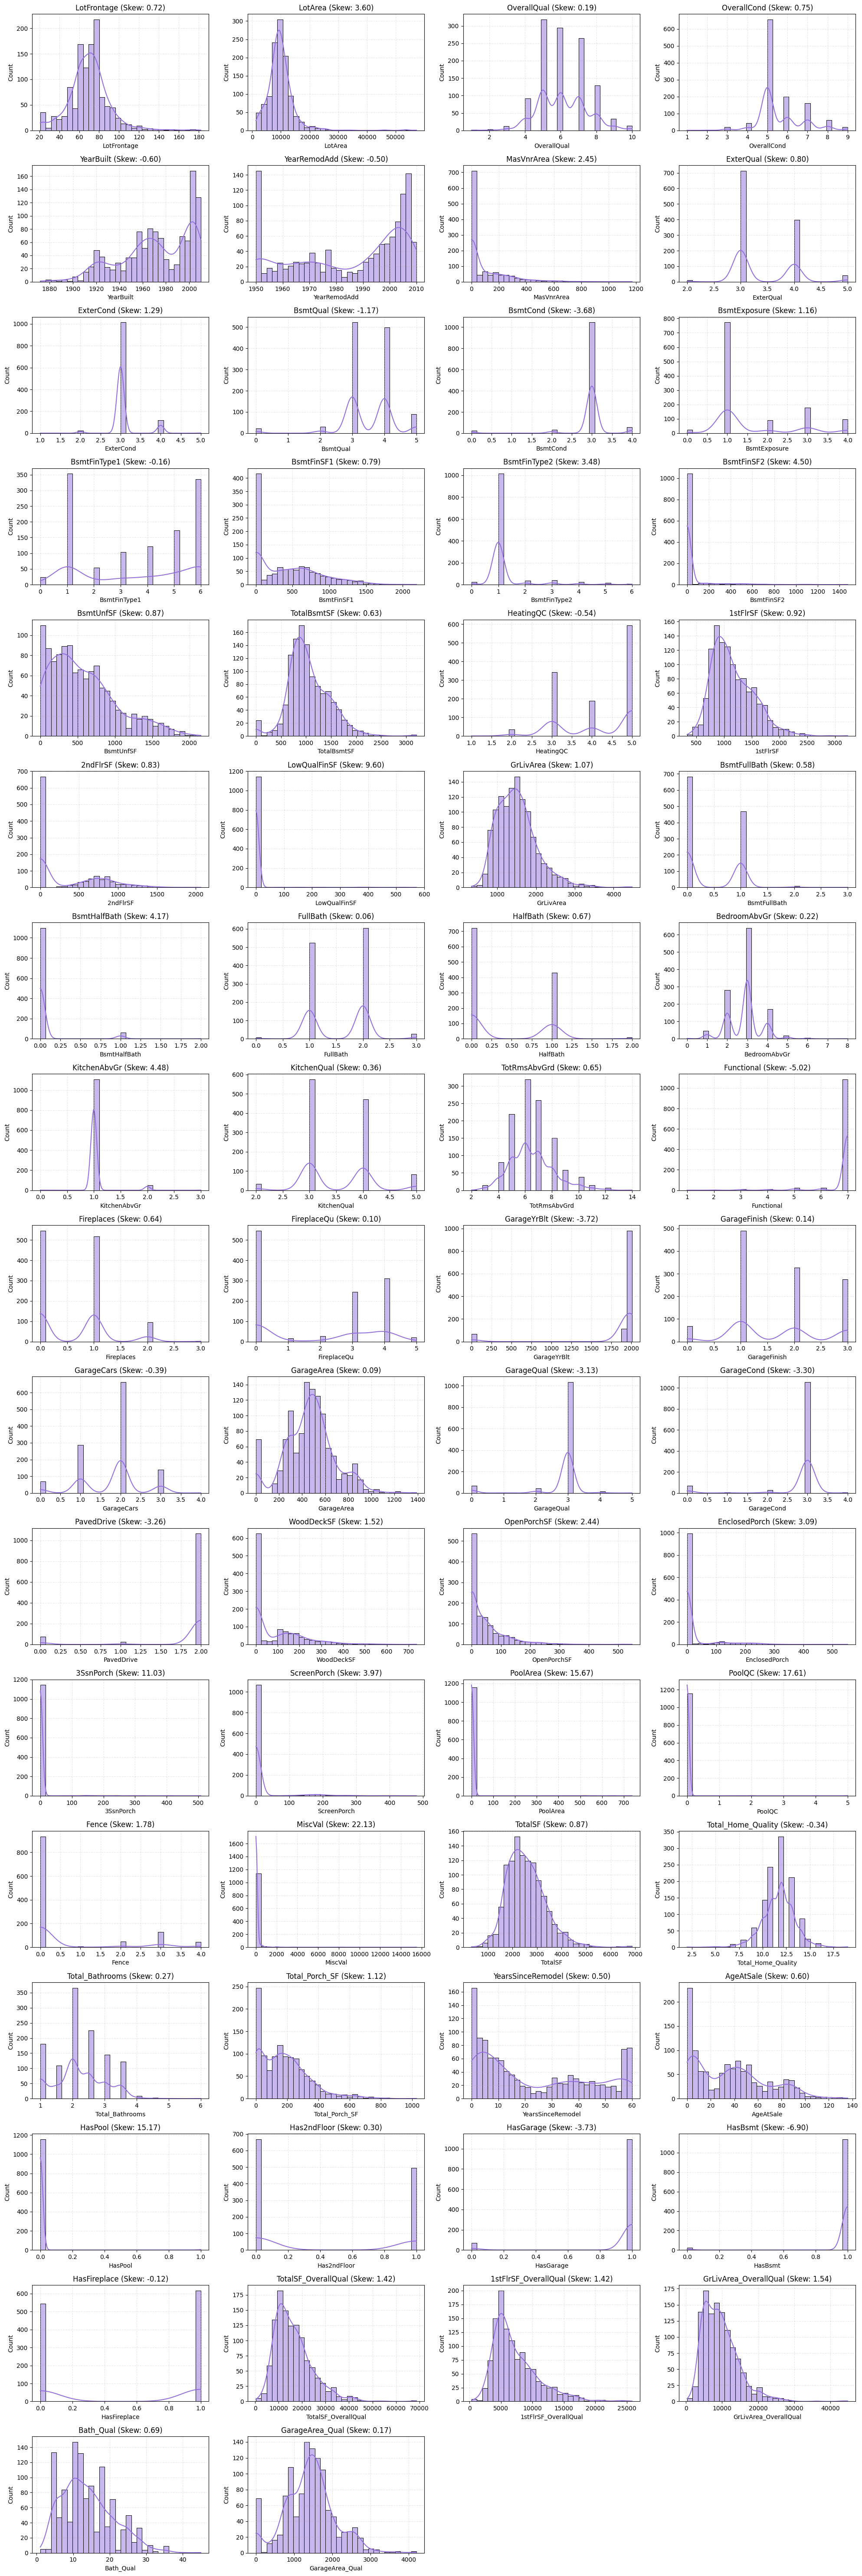

In [ ]:
# 히스토그램


# 1. 수치형 컬럼만 자동 수집 (Id 제외, Target 포함 여부는 선택)
# 보통 타깃(SalePrice)의 분포도 같이 보는 게 좋아서 포함시키는 경우가 많음
numeric_cols = train.select_dtypes(include=['number']).columns
numeric_cols = [col for col in numeric_cols if col not in ['SalePrice_log', 'Id']]

# 2. 서브플롯 그리드 크기 계산
cols_per_row = 4
rows = (len(numeric_cols) - 1) // cols_per_row + 1

# 3. 전체 캔버스 크기 설정
plt.figure(figsize=(20, rows * 3.5))

# 4. 반복문으로 그리기
for i, feature in enumerate(numeric_cols):
    plt.subplot(rows, cols_per_row, i + 1)

    # histplot: 히스토그램 + 밀도 곡선(kde=True)
    sns.histplot(train[feature], kde=True, bins=30, color='mediumpurple', edgecolor='black')

    # 왜도(Skewness) 수치를 제목에 표시하면 더 유용함
    skewness = train[feature].skew()
    plt.title(f'{feature} (Skew: {skewness:.2f})')
    plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import skew, boxcox_normmax
from scipy.special import boxcox1p

# 1. 수치형 컬럼만 골라내기
numeric_feats = train.dtypes[train.dtypes != "object"].index

# 2. 제외할 컬럼 리스트 (타깃, ID, 그리고 연도 관련 변수들)
# 연도 변수는 분포 변환보다 그대로 두거나, 'Age'(경과년수) 파생변수를 쓰는 게 낫습니다.
cols_to_exclude = ['SalePrice', 'SalePrice_log', 'Id',
                   'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

# 3. [필터링 핵심] 제외 목록 + 고유값 개수(nunique) 15개 초과만 선택
# (이진 변수나 단순 등급 변수는 빠지고, 진짜 연속형 변수만 남습니다)
numeric_feats = [col for col in numeric_feats
                 if col not in cols_to_exclude and train[col].nunique() > 15]

# 4. 왜도 계산 (Train 기준)
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

# 5. 왜도 0.75 이상 필터링
high_skew = skewed_feats[abs(skewed_feats) > 0.75]
skewed_features = high_skew.index

print(f"변환 대상 컬럼 개수: {len(skewed_features)}")
print("--- 변환될 컬럼 목록 (상위 10개) ---")
print(high_skew.head(10))

# 6. 최적 람다 적용 (Box-Cox)
lambda_dict = {}

for feat in skewed_features:
    # (1) 최적 람다 찾기
    try:
        # 0이 많은 데이터는 +1 해서 계산
        optimal_lambda = boxcox_normmax(train[feat].dropna() + 1)

        # 람다가 너무 크거나 작으면(불안정하면) 그냥 0.15로 고정하는 안전장치
        if optimal_lambda < -1 or optimal_lambda > 2:
            optimal_lambda = 0.15

    except:
        optimal_lambda = 0.15 # 계산 실패 시 기본값

    lambda_dict[feat] = optimal_lambda

    # (2) Train 변환
    train[feat] = boxcox1p(train[feat], optimal_lambda)

    # (3) Test 변환 (Test에 해당 컬럼이 있으면)
    if feat in test.columns:
        test[feat] = boxcox1p(test[feat], optimal_lambda)

print("\nBox-Cox 변환 완료!")
# print(f"적용된 람다값: {lambda_dict}")

변환 대상 컬럼 개수: 20
--- 변환될 컬럼 목록 (상위 10개) ---
MiscVal                  22.103469
3SsnPorch                11.011591
LowQualFinSF              9.583359
BsmtFinSF2                4.498604
ScreenPorch               3.964727
LotArea                   3.590861
EnclosedPorch             3.083737
MasVnrArea                2.446795
OpenPorchSF               2.435503
GrLivArea_OverallQual     1.541867
dtype: float64

Box-Cox 변환 완료!


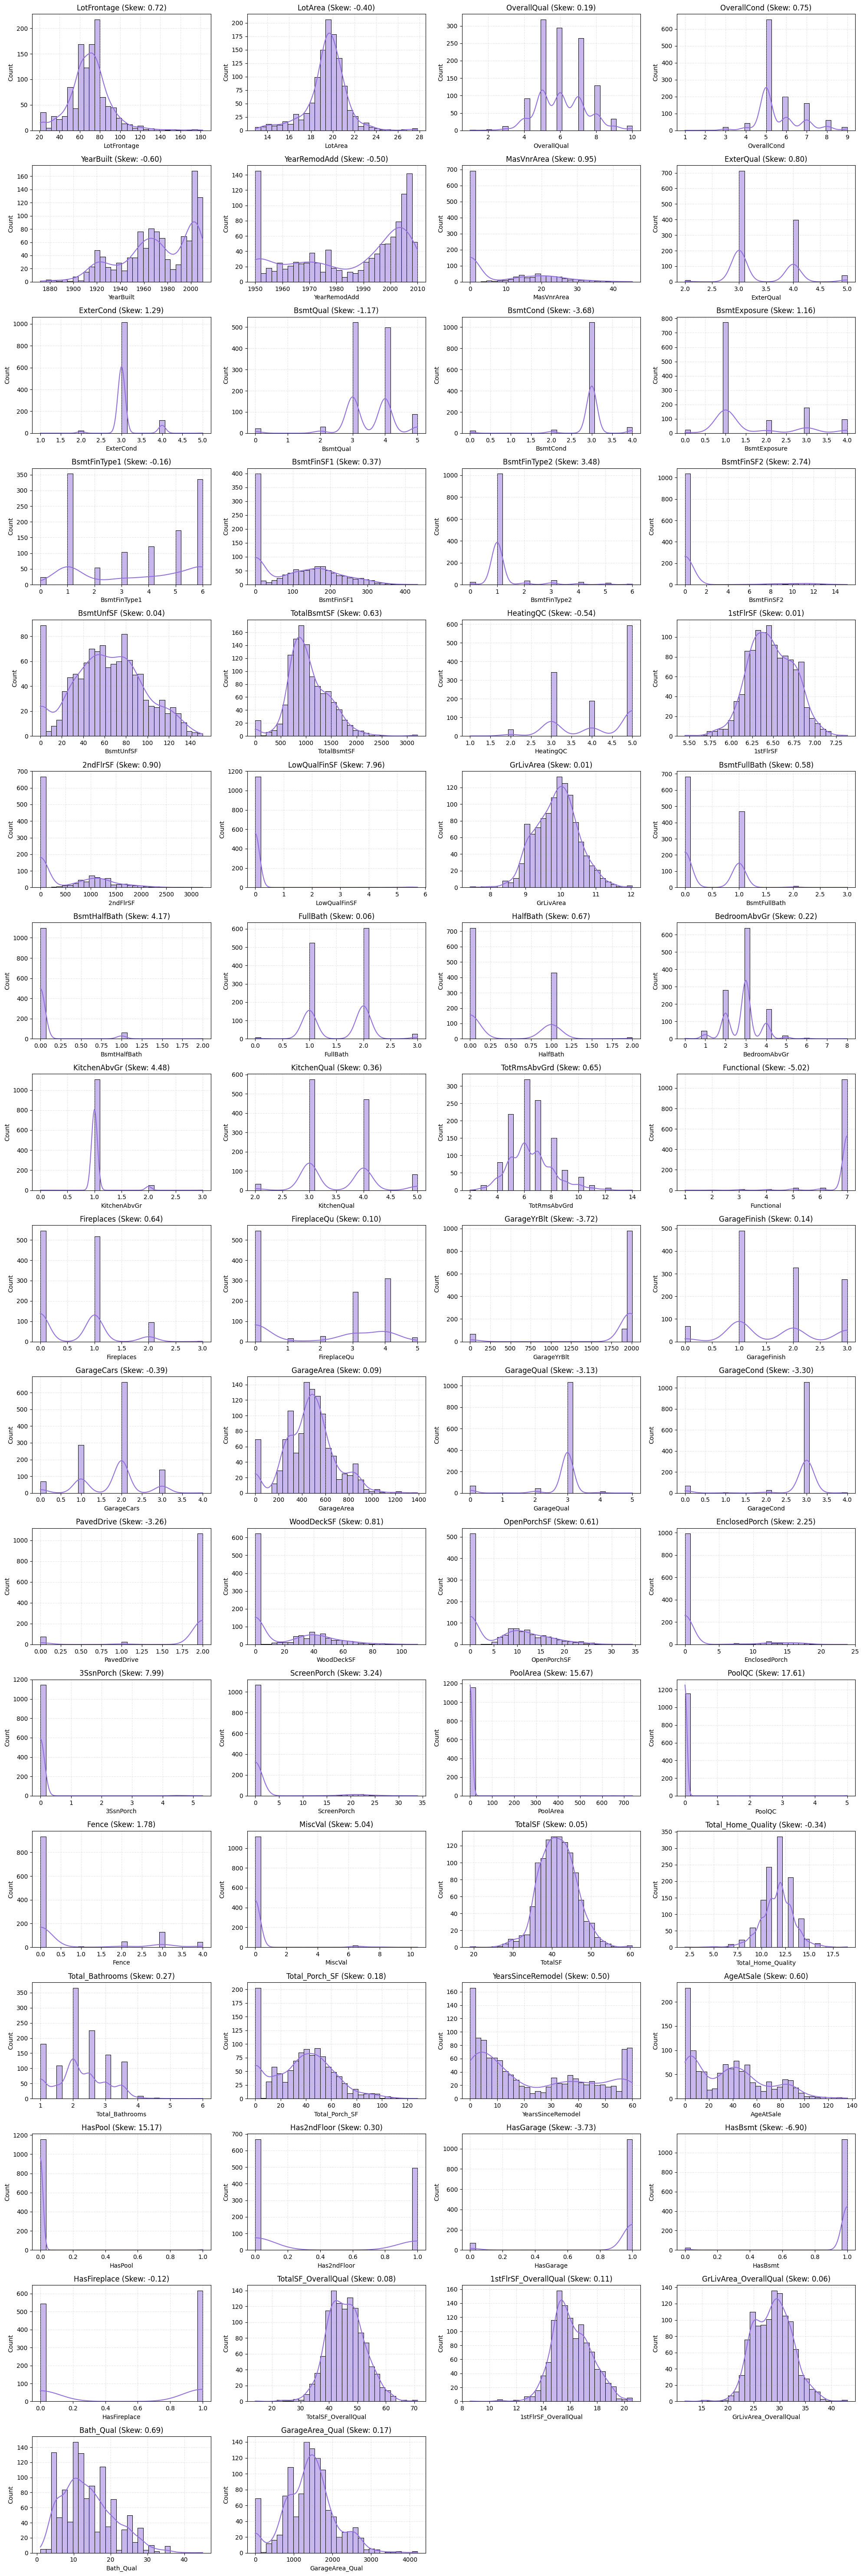

In [ ]:
# 히스토그램


# 1. 수치형 컬럼만 자동 수집 (Id 제외, Target 포함 여부는 선택)
# 보통 타깃(SalePrice)의 분포도 같이 보는 게 좋아서 포함시키는 경우가 많음
numeric_cols = train.select_dtypes(include=['number']).columns
numeric_cols = [col for col in numeric_cols if col not in ['SalePrice_log', 'Id']]

# 2. 서브플롯 그리드 크기 계산
cols_per_row = 4
rows = (len(numeric_cols) - 1) // cols_per_row + 1

# 3. 전체 캔버스 크기 설정
plt.figure(figsize=(20, rows * 3.5))

# 4. 반복문으로 그리기
for i, feature in enumerate(numeric_cols):
    plt.subplot(rows, cols_per_row, i + 1)

    # histplot: 히스토그램 + 밀도 곡선(kde=True)
    sns.histplot(train[feature], kde=True, bins=30, color='mediumpurple', edgecolor='black')

    # 왜도(Skewness) 수치를 제목에 표시하면 더 유용함
    skewness = train[feature].skew()
    plt.title(f'{feature} (Skew: {skewness:.2f})')
    plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
# 로버스트 스케일링ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

In [ ]:
# from sklearn.preprocessing import RobustScaler

# # 1. 스케일링 대상 컬럼 선정
# # (object 타입 제외, 그리고 타깃과 ID 제외)
# scale_cols = train.select_dtypes(exclude=['object']).columns
# scale_cols = scale_cols.drop(['Id', 'SalePrice', 'SalePrice_log'], errors='ignore')

# print(f"스케일링 적용 컬럼 개수: {len(scale_cols)}")

# # 2. 로버스트 스케일러 객체 생성
# scaler = RobustScaler()

# # 3. 학습(fit)은 오직 Train 데이터로만!
# scaler.fit(train[scale_cols])

# # 4. 변환(transform)은 Train과 Test 둘 다!
# train[scale_cols] = scaler.transform(train[scale_cols])
# test[scale_cols] = scaler.transform(test[scale_cols])

# print("모든 수치형 변수에 Robust Scaling 완료!")

# # 확인용 (스케일링이 잘 됐는지 중앙값 확인 -> 0 근처여야 함)
# print(train[scale_cols].median().head())

In [ ]:
train.head()

MSSubClass MSZoning  LotFrontage    LotArea Street Alley LotShape  \
0         20       RL         75.0  18.697128   Pave  None      IR1   
1         90       RL         60.0  20.182347   Pave  None      Reg   
2         20       RL         54.0  21.191160   Pave  None      IR1   
3         20       RL         93.0  20.620221   Pave  None      Reg   
4         50       RL         60.0  19.031338   Pave  None      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
2         Lvl    AllPub    Inside       Gtl       Timber       Norm   
3         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
4         Lvl    AllPub    Corner       Gtl        NAmes     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            7       1955   
1       Norm   Duplex     1Story            5            5       1987   
2       Norm     1Fam     1Story            6            6       1987   
3       Norm     1Fam     1Story            8            5       2007   
4       Norm     1Fam     1.5Fin            5            7       1949   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1955       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
1          1988     Gable  CompShg     Plywood     Plywood       None   
2          1987     Gable  CompShg     HdBoard     HdBoard    BrkFace   
3          2007       Hip  CompShg     VinylSd     VinylSd    BrkFace   
4          2006     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea  ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  \
0   17.652055          3          3     CBlock         3         3   
1    0.000000          3          3     CBlock         4         4   
2   12.278482          3          3     CBlock         4         4   
3   22.592222          5          3      PConc         5         3   
4    0.000000          3          4     CBlock         3         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             5  221.734760             1      0.0000   
1             4             6  275.155262             1      0.0000   
2             1             6  236.090628             2      5.2873   
3             1             1    0.000000             1      0.0000   
4             2             1    0.000000             1      0.0000   

    BsmtUnfSF  TotalBsmtSF Heating  HeatingQC CentralAir Electrical  1stFlrSF  \
0   36.025226         1098    GasA          3          Y      SBrkr  6.475611   
1    0.000000         1200    GasA          3          Y      SBrkr  6.551284   
2   22.597149         1112    GasA          4          Y      SBrkr  6.505361   
3  131.482912         1694    GasA          5          Y      SBrkr  6.843598   
4   75.807735          672    GasA          5          Y      SBrkr  6.054728   

     2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0    0.000000           0.0   9.421437             1             0         1   
1    0.000000           0.0   9.578445             3             0         3   
2    0.000000           0.0   9.482992             1             0         2   
3    0.000000           0.0  10.198727             0             0         2   
4  342.299229           0.0   9.119728             0             0         1   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         0             3             1            3             6   
1         0             3             1            3             5   
2         0             2             1            4             5   
3         0             3             1            4             7   
4         0             3             1            3             6   

   Functional  Fireplaces  Firepl

In [ ]:
test.head()

MSSubClass MSZoning  LotFrontage    LotArea Street Alley LotShape  \
0         60       RL        121.0  21.828459   Pave  None      Reg   
1         60       RL         82.0  19.854263   Pave  None      IR1   
2         50       RL         79.0  19.666648   Pave  None      Reg   
3         70       RM         50.0  19.992137   Pave  None      IR1   
4         50       RL         80.0  19.225942   Pave  None      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
1         Lvl    AllPub    Inside       Gtl      NoRidge       Norm   
2         Lvl    AllPub    Inside       Gtl        NAmes     Artery   
3         Bnk    AllPub    Inside       Gtl      OldTown       RRAn   
4         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            8            5       1991   
1       Norm     1Fam     2Story            7            5       1995   
2       Norm     1Fam     1.5Fin            6            7       1941   
3      Feedr     1Fam     2Story            7            6       1921   
4       Norm     1Fam     1.5Fin            5            5       1947   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1992       Hip  CompShg     HdBoard     HdBoard    BrkFace   
1          1995     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2          1950     Gable  CompShg     Wd Sdng     Wd Sdng       None   
3          1950     Gable  CompShg      Stucco      Stucco       None   
4          1950     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea  ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  \
0   23.804341          4          3     CBlock         4         3   
1   24.037855          4          3      PConc         4         3   
2    0.000000          3          3     CBlock         3         3   
3    0.000000          3          3     BrkTil         3         3   
4    0.000000          3          3     CBlock         3         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             1    0.000000             1    0.000000   
1             1             6  155.599726             1    0.000000   
2             1             4  120.419224             3    8.393654   
3             1             1    0.000000             1    0.000000   
4             1             3  129.165561             1    0.000000   

    BsmtUnfSF  TotalBsmtSF Heating  HeatingQC CentralAir Electrical  1stFlrSF  \
0  111.737364         1288    GasA          5          Y      SBrkr  6.619998   
1   73.488245         1203    GasA          5          Y      SBrkr  6.561154   
2   40.549948          806    GasA          3          Y      FuseA  6.359133   
3   69.122603          576    GasA          4          Y      SBrkr  6.307587   
4   54.679782          832    GasA          3          Y      SBrkr  6.238351   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0  1672.527769           0.0  10.856703             0             0         2   
1  1977.841598           0.0  10.935212             0             0         2   
2   893.644587           0.0  10.069679             1             0         1   
3  1185.243971           0.0  10.215885             0             0         2   
4   536.238688           0.0   9.601954             0             0         1   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         1             4             1            4             9   
1         1             4             1            4             9   
2         0             3             1            2             5   
3         0             3             1            3             9   
4         0             2             1            3             6   

   Functional  Fireplaces  

In [ ]:
train.to_csv('train_fe.csv', index=False)
test.to_csv('test_fe.csv', index=False)

In [ ]:
# train.to_csv('train_fe_rs.csv', index=False)
# test.to_csv('test_fe_rs.csv', index=False)

In [ ]:
print('저장 완료')

저장 완료


In [ ]:
train.shape

(1162, 96)

In [ ]:
# # 커널릿지 OOF 추출

# import numpy as np
# import pandas as pd
# import optuna
# from sklearn.kernel_ridge import KernelRidge
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import RobustScaler
# from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
# from sklearn.metrics import mean_squared_error


# # --- (전처리된 X_train, y_train, X_test, train 변수가 있다고 가정) ---
# # 1. 데이터 준비
# # ---------------------------------------------------------
# target_col = 'SalePrice_log' if 'SalePrice_log' in train.columns else 'SalePrice'
# y_train = train[target_col]

# X_train_raw = train.drop([target_col, 'Id'], axis=1, errors='ignore')
# X_test_raw = test.drop([target_col, 'Id'], axis=1, errors='ignore')

# all_data = pd.concat([X_train_raw, X_test_raw])
# all_data_dummies = pd.get_dummies(all_data)

# X_train = all_data_dummies[:len(train)]
# X_test = all_data_dummies[len(train):]

# print(f"원핫 인코딩 완료: 컬럼 수 {X_train.shape[1]}개")



# # 1. 목적 함수 정의 (Objective Function)
# def objective(trial):
#     alpha = trial.suggest_float('alpha', 0.1, 1.5)
#     coef0 = trial.suggest_float('coef0', 1.0, 5.0)
#     degree = trial.suggest_int('degree', 2, 3)

#     model = make_pipeline(
#         RobustScaler(),
#         KernelRidge(kernel='polynomial', alpha=alpha, coef0=coef0, degree=degree)
#     )

#     kf = KFold(n_splits=10, shuffle=True, random_state=42)

#     scores = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=kf, n_jobs=-1)
#     rmse = -scores.mean()

#     return rmse

# # 2. Optuna Study 생성
# sampler = optuna.samplers.TPESampler(seed=42)
# study = optuna.create_study(direction='minimize', sampler=sampler)

# # 3. [핵심] 국룰 파라미터 Enqueue
# print("🚀 국룰 파라미터(Baseline)를 대기열에 추가합니다...")
# study.enqueue_trial({'alpha': 0.6, 'coef0': 2.5, 'degree': 2})

# # 4. 최적화 실행
# print("🔥 Optuna 최적화 시작...")
# study.optimize(objective, n_trials=100)

# # 5. 결과 확인
# print("\n=============================================")
# print(f"🏆 Best RMSE (Log Scale): {study.best_value:.5f}")
# print(f"🔧 Best Params: {study.best_params}")
# print("=============================================")

# # 6. 최적 모델로 재학습 및 Test 예측
# best_params = study.best_params
# best_krr = make_pipeline(
#     RobustScaler(),
#     KernelRidge(kernel='polynomial',
#                 alpha=best_params['alpha'],
#                 coef0=best_params['coef0'],
#                 degree=best_params['degree'])
# )

# # 전체 데이터 학습
# best_krr.fit(X_train, y_train)

# # Test 예측 및 역변환
# pred_log_opt = best_krr.predict(X_test)
# pred_final_opt = np.expm1(pred_log_opt)

# # 제출 파일 저장
# if 'submission' not in locals():
#     # submission 변수가 없으면 생성 (Id는 test 데이터 기준)
#     submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': pred_final_opt}) # test['Id']는 살아있다고 가정
# else:
#     submission['SalePrice'] = pred_final_opt

# submission.to_csv('submission_krr_optuna.csv', index=False)
# print("✅ 최적화된 KRR 제출 파일(submission_krr_optuna.csv) 저장 완료!")


# # ==========================================================
# # 7. [수정됨] 스태킹용 OOF(Out-of-Fold) 추출 및 저장 (Id 없이)
# # ==========================================================
# print("\n🚀 스태킹을 위한 OOF 데이터 생성 중...")

# # Optuna 때와 동일한 CV 전략 사용 (필수)
# kf = KFold(n_splits=10, shuffle=True, random_state=42)

# # cross_val_predict: 교차 검증을 수행하며 hold-out set에 대한 예측값만 모아줌
# oof_preds_log = cross_val_predict(best_krr, X_train, y_train, cv=kf, n_jobs=-1)

# # OOF 점수 확인 (Optuna Best Score와 거의 일치해야 정상)
# oof_rmse = np.sqrt(mean_squared_error(y_train, oof_preds_log))
# print(f"✅ OOF RMSE (Log Scale): {oof_rmse:.5f}")

# # ★★★ [수정] train 데이터프레임에 바로 'oof_krr' 컬럼으로 추가 ★★★
# # 순서가 100% 일치하므로 안전하게 추가 가능
# train['oof_krr'] = oof_preds_log

# # train 데이터프레임을 통째로 저장 (인덱스 유지)
# # 나중에 다른 모델의 OOF도 이 train 데이터프레임에 계속 추가하면 됩니다.
# train.to_csv('train_with_krr_oof.csv', index=True)
# print("✅ train 데이터프레임에 KRR OOF를 추가하여 저장(train_with_krr_oof.csv) 완료!")

In [ ]:
sub_lin = pd.read_csv('submission_best_linear.csv')
sub_krr = pd.read_csv('submission_krr_optuna.csv')
sub_nn = pd.read_csv('submission_nn.csv')

submission_df = pd.read_csv('sample_submission.csv')


In [ ]:
oof_lin_full = pd.read_csv('train_with_oof_linear.csv')
oof_krr_full = pd.read_csv('train_with_krr_oof.csv')
oof_nn_full = pd.read_csv('train_with_oof_nn.csv')




In [ ]:
import pandas as pd

# 1. 각 DF에서 마지막 컬럼(OOF)만 추출
# iloc[:, [-1]] 처럼 대괄호를 한 번 더 쓰면 DataFrame 형태로 추출되어 합치기 편합니다.
oof_lin = oof_lin_full.iloc[:, [-1]]
oof_krr = oof_krr_full.iloc[:, [-1]]
oof_nn = oof_nn_full.iloc[:, [-1]]

# 2. 컬럼명이 겹칠 수 있으므로 각각 이름을 변경해줍니다.
oof_lin.columns = ['OOF_Linear']
oof_krr.columns = ['OOF_KRR']
oof_nn.columns = ['OOF_NN']

# 3. 타깃 컬럼 추출 (어떤 DF에서 가져와도 무방합니다)
# 타깃 컬럼명이 'SalePrice_log'라고 하셨으니 이를 명시적으로 가져옵니다.
target = oof_lin_full[['SalePrice_log']]

# 4. 하나로 합치기 (axis=1은 가로로 붙이라는 뜻입니다)
combined_df = pd.concat([oof_lin, oof_krr, oof_nn, target], axis=1)

# 결과 확인
print(combined_df.head())
print(f"\n총 컬럼 수: {len(combined_df.columns)}")

   OOF_Linear    OOF_KRR     OOF_NN  SalePrice_log
0   11.781802  11.811920  11.823414      11.813037
1   11.787951  11.926230  11.867779      12.095147
2   12.073636  12.067921  12.051265      12.078245
3   12.482703  12.487781  12.467299      12.669810
4   11.645029  11.617854  11.686798      11.719134

총 컬럼 수: 4


In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

# ====================================================
# 1. 데이터 준비
# ====================================================
# OOF 예측값 리스트 (순서 중요: Linear -> KRR -> NN)
oof_preds = [
    combined_df['OOF_Linear'].values,
    combined_df['OOF_KRR'].values,
    combined_df['OOF_NN'].values
]

# 정답 (로그 스케일)
y_true = combined_df['SalePrice_log'].values

print(f"✅ 데이터 로드 완료. 샘플 수: {len(y_true)}")

# ====================================================
# 2. 최적 가중치 찾기 (Scipy Optimize)
# ====================================================
def get_best_weights(oof_list, y_true):
    """
    OOF 예측값들의 가중합과 실제값 사이의 RMSE를 최소화하는 가중치를 찾음
    """
    def loss_func(weights):
        final_oof = 0
        for i, oof in enumerate(oof_list):
            final_oof += weights[i] * oof
        return np.sqrt(mean_squared_error(y_true, final_oof))

    # 제약 조건: 가중치의 합은 1
    cons = ({'type': 'eq', 'fun': lambda w: 1 - sum(w)})

    # 범위 조건: 각 가중치는 0 ~ 1 사이 (음수 가중치 방지)
    bounds = [(0, 1)] * len(oof_list)

    # 초기값: 균등하게 시작 (0.33, 0.33, 0.33)
    initial_weights = [1/len(oof_list)] * len(oof_list)

    # 최적화 실행
    result = minimize(loss_func, initial_weights, method='SLSQP', bounds=bounds, constraints=cons)
    return result.x

# 최적화 수행
best_w = get_best_weights(oof_preds, y_true)

print("\n" + "="*45)
print("🏆 최적 블렌딩 가중치 (황금 비율)")
print("="*45)
print(f"👉 Linear (Lasso/Ridge): {best_w[0]:.4f}")
print(f"👉 Kernel Ridge (KRR):   {best_w[1]:.4f}")
print(f"👉 Neural Net (AG):      {best_w[2]:.4f}")
print("="*45)


# ====================================================
# 3. 최종 서브미션 파일 블렌딩
# ====================================================
print("\n🚀 최종 제출 파일 생성 중...")

# 서브미션 파일 로드
sub_lin = pd.read_csv('submission_best_linear.csv')
sub_krr = pd.read_csv('submission_krr_optuna.csv')
sub_nn = pd.read_csv('submission_nn.csv')
submission_df = pd.read_csv('sample_submission.csv') # 껍데기

# ★ 중요: 서브미션 파일들은 이미 '원래 가격($)'으로 복원된 상태입니다.
# 하지만 블렌딩은 '로그 스케일'에서 해야 정확도가 높습니다. (RMSLE 지표 특성)
# 따라서 다시 로그를 취한 뒤 섞습니다.
p1 = np.log1p(sub_lin['SalePrice'])
p2 = np.log1p(sub_krr['SalePrice'])
p3 = np.log1p(sub_nn['SalePrice'])

# 찾은 가중치로 섞기
final_log_pred = (best_w[0] * p1) + (best_w[1] * p2) + (best_w[2] * p3)

# 최종적으로 다시 원래 가격으로 복구 (Exp)
final_pred = np.expm1(final_log_pred)

# 저장
submission_df['SalePrice'] = final_pred
submission_df.to_csv('submission_final_blended.csv', index=False)

print("✅ 최종 파일 저장 완료: submission_final_blended.csv")
print(submission_df.head())

✅ 데이터 로드 완료. 샘플 수: 1162

🏆 최적 블렌딩 가중치 (황금 비율)
👉 Linear (Lasso/Ridge): 0.3049
👉 Kernel Ridge (KRR):   0.1909
👉 Neural Net (AG):      0.5042

🚀 최종 제출 파일 생성 중...
✅ 최종 파일 저장 완료: submission_final_blended.csv
    Id      SalePrice
0   86  261110.927887
1  227  256055.428602
2  492  141927.241607
3   64  131852.567301
4  576  114771.046868


In [ ]:
combined_df.to_csv('oof_lin_krr_nn.csv')

In [ ]:
combined_df.head()

OOF_Linear    OOF_KRR     OOF_NN  SalePrice_log
0   11.781802  11.811920  11.823414      11.813037
1   11.787951  11.926230  11.867779      12.095147
2   12.073636  12.067921  12.051265      12.078245
3   12.482703  12.487781  12.467299      12.669810
4   11.645029  11.617854  11.686798      11.719134

In [ ]:
import pandas as pd
import numpy as np

# 1. Train 데이터에 OOF 컬럼 3개 붙이기
# combined_df에서 이미 생성된 OOF_Linear, OOF_KRR, OOF_NN 컬럼만 가져옵니다.
oof_features = combined_df[['OOF_Linear', 'OOF_KRR', 'OOF_NN']]
train_final = pd.concat([train, oof_features], axis=1)

# 2. Test 데이터에 각 모델의 서브미션(예측값) 로그 씌워서 붙이기
# sub_lin, sub_krr, sub_nn 데이터프레임의 'SalePrice' 컬럼을 로그 변환(np.log1p)하여 추가합니다.
test_final = test.copy() # 원본 보존을 위해 복사본 생성

test_final['OOF_Linear'] = np.log1p(sub_lin['SalePrice'])
test_final['OOF_KRR'] = np.log1p(sub_krr['SalePrice'])
test_final['OOF_NN'] = np.log1p(sub_nn['SalePrice'])

# 3. 결과 확인
print("--- Train Final Columns ---")
print(train_final.columns[-5:]) # 마지막 5개 컬럼 확인
print("\n--- Test Final Columns ---")
print(test_final.columns[-5:])  # 마지막 5개 컬럼 확인

# 이제 이 데이터를 사용해 오토글루온 학습을 시작하시면 됩니다!
# label='SalePrice_log' (혹은 학습에 사용하신 타겟 변수명)를 지정하세요.

--- Train Final Columns ---
Index(['Bath_Qual', 'GarageArea_Qual', 'OOF_Linear', 'OOF_KRR', 'OOF_NN'], dtype='object')

--- Test Final Columns ---
Index(['Bath_Qual', 'GarageArea_Qual', 'OOF_Linear', 'OOF_KRR', 'OOF_NN'], dtype='object')


In [ ]:
train_final.head()

MSSubClass MSZoning  LotFrontage    LotArea Street Alley LotShape  \
0         20       RL         75.0  18.697128   Pave  None      IR1   
1         90       RL         60.0  20.182347   Pave  None      Reg   
2         20       RL         54.0  21.191160   Pave  None      IR1   
3         20       RL         93.0  20.620221   Pave  None      Reg   
4         50       RL         60.0  19.031338   Pave  None      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
2         Lvl    AllPub    Inside       Gtl       Timber       Norm   
3         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
4         Lvl    AllPub    Corner       Gtl        NAmes     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            7       1955   
1       Norm   Duplex     1Story            5            5       1987   
2       Norm     1Fam     1Story            6            6       1987   
3       Norm     1Fam     1Story            8            5       2007   
4       Norm     1Fam     1.5Fin            5            7       1949   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1955       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
1          1988     Gable  CompShg     Plywood     Plywood       None   
2          1987     Gable  CompShg     HdBoard     HdBoard    BrkFace   
3          2007       Hip  CompShg     VinylSd     VinylSd    BrkFace   
4          2006     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea  ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  \
0   17.652055          3          3     CBlock         3         3   
1    0.000000          3          3     CBlock         4         4   
2   12.278482          3          3     CBlock         4         4   
3   22.592222          5          3      PConc         5         3   
4    0.000000          3          4     CBlock         3         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             5  221.734760             1      0.0000   
1             4             6  275.155262             1      0.0000   
2             1             6  236.090628             2      5.2873   
3             1             1    0.000000             1      0.0000   
4             2             1    0.000000             1      0.0000   

    BsmtUnfSF  TotalBsmtSF Heating  HeatingQC CentralAir Electrical  1stFlrSF  \
0   36.025226         1098    GasA          3          Y      SBrkr  6.475611   
1    0.000000         1200    GasA          3          Y      SBrkr  6.551284   
2   22.597149         1112    GasA          4          Y      SBrkr  6.505361   
3  131.482912         1694    GasA          5          Y      SBrkr  6.843598   
4   75.807735          672    GasA          5          Y      SBrkr  6.054728   

     2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0    0.000000           0.0   9.421437             1             0         1   
1    0.000000           0.0   9.578445             3             0         3   
2    0.000000           0.0   9.482992             1             0         2   
3    0.000000           0.0  10.198727             0             0         2   
4  342.299229           0.0   9.119728             0             0         1   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         0             3             1            3             6   
1         0             3             1            3             5   
2         0             2             1            4             5   
3         0             3             1            4             7   
4         0             3             1            3             6   

   Functional  Fireplaces  Firepl

In [ ]:
test_final.head()

MSSubClass MSZoning  LotFrontage    LotArea Street Alley LotShape  \
0         60       RL        121.0  21.828459   Pave  None      Reg   
1         60       RL         82.0  19.854263   Pave  None      IR1   
2         50       RL         79.0  19.666648   Pave  None      Reg   
3         70       RM         50.0  19.992137   Pave  None      IR1   
4         50       RL         80.0  19.225942   Pave  None      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
1         Lvl    AllPub    Inside       Gtl      NoRidge       Norm   
2         Lvl    AllPub    Inside       Gtl        NAmes     Artery   
3         Bnk    AllPub    Inside       Gtl      OldTown       RRAn   
4         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            8            5       1991   
1       Norm     1Fam     2Story            7            5       1995   
2       Norm     1Fam     1.5Fin            6            7       1941   
3      Feedr     1Fam     2Story            7            6       1921   
4       Norm     1Fam     1.5Fin            5            5       1947   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1992       Hip  CompShg     HdBoard     HdBoard    BrkFace   
1          1995     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2          1950     Gable  CompShg     Wd Sdng     Wd Sdng       None   
3          1950     Gable  CompShg      Stucco      Stucco       None   
4          1950     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea  ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  \
0   23.804341          4          3     CBlock         4         3   
1   24.037855          4          3      PConc         4         3   
2    0.000000          3          3     CBlock         3         3   
3    0.000000          3          3     BrkTil         3         3   
4    0.000000          3          3     CBlock         3         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             1    0.000000             1    0.000000   
1             1             6  155.599726             1    0.000000   
2             1             4  120.419224             3    8.393654   
3             1             1    0.000000             1    0.000000   
4             1             3  129.165561             1    0.000000   

    BsmtUnfSF  TotalBsmtSF Heating  HeatingQC CentralAir Electrical  1stFlrSF  \
0  111.737364         1288    GasA          5          Y      SBrkr  6.619998   
1   73.488245         1203    GasA          5          Y      SBrkr  6.561154   
2   40.549948          806    GasA          3          Y      FuseA  6.359133   
3   69.122603          576    GasA          4          Y      SBrkr  6.307587   
4   54.679782          832    GasA          3          Y      SBrkr  6.238351   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0  1672.527769           0.0  10.856703             0             0         2   
1  1977.841598           0.0  10.935212             0             0         2   
2   893.644587           0.0  10.069679             1             0         1   
3  1185.243971           0.0  10.215885             0             0         2   
4   536.238688           0.0   9.601954             0             0         1   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         1             4             1            4             9   
1         1             4             1            4             9   
2         0             3             1            2             5   
3         0             3             1            3             9   
4         0             2             1            3             6   

   Functional  Fireplaces  

In [ ]:
train_final.to_csv('train_fe_oof.csv', index=False)
test_final.to_csv('test_fe_oof.csv', index=False)

In [ ]:
# OOF 릿지CV

import pandas as pd
import numpy as np
from sklearn.linear_model import RidgeCV

# 1. 학습 데이터 준비 (OOF)
# combined_df에서 Train에 해당하는 영역만 사용해야 합니다.
# SalePrice_log가 결측치가 아닌 부분이 Train 데이터입니다.
train_mask = combined_df['SalePrice_log'].notnull()
oof_cols = ['OOF_Linear', 'OOF_KRR', 'OOF_NN']

X_meta_train = combined_df.loc[train_mask, oof_cols]
y_meta_train = combined_df.loc[train_mask, 'SalePrice_log']

# 2. 메타 모델 정의 및 학습 (RidgeCV)
# alphas는 규제 강도 후보군입니다.
meta_model = RidgeCV(alphas=[0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 30.0, 50.0])
meta_model.fit(X_meta_train, y_meta_train)

# 3. 모델별 반영 비중(가중치) 확인
print("📊 [메타 모델] 각 전문가별 가중치:")
for col, coef in zip(oof_cols, meta_model.coef_):
    print(f"🔹 {col}: {coef:.4f}")
print(f"🔹 절편(Intercept): {meta_model.intercept_:.4f}")
print(f"🔹 선택된 최적 Alpha: {meta_model.alpha_}")

# 4. 테스트 데이터 예측용 피처 생성 (Submission 값 활용)
# 학습 데이터와 컬럼명을 똑같이 맞춰주는 것이 핵심입니다.
X_meta_test = pd.DataFrame({
    'OOF_Linear': np.log1p(sub_lin['SalePrice']),
    'OOF_KRR': np.log1p(sub_krr['SalePrice']),
    'OOF_NN': np.log1p(sub_nn['SalePrice'])
})

# 5. 최종 예측 및 역변환
final_preds_log = meta_model.predict(X_meta_test)
final_preds = np.expm1(final_preds_log)

# 6. 제출 파일 생성
submission_df = pd.read_csv('sample_submission.csv')
submission_df['SalePrice'] = final_preds
submission_df.to_csv('final_stacking_submission.csv', index=False)

print("\n✅ 스태킹 최종 제출 파일 'final_stacking_submission.csv' 저장 완료!")
print(f'가중치 해석: {meta_model.coef_}')

📊 [메타 모델] 각 전문가별 가중치:
🔹 OOF_Linear: 0.3094
🔹 OOF_KRR: 0.2544
🔹 OOF_NN: 0.4458
🔹 절편(Intercept): -0.1156
🔹 선택된 최적 Alpha: 1.0

✅ 스태킹 최종 제출 파일 'final_stacking_submission.csv' 저장 완료!
가중치 해석: [0.30940944 0.25439975 0.4457926 ]


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import KFold, cross_val_score

# =================================================
# 1. 데이터 준비 (X, y 분리 및 인코딩)
# =================================================
print("🚀 데이터 준비 중...")

# 타겟 변수명 확인 (SalePrice_log라고 가정)
target_col = 'SalePrice_log'
if target_col not in train_final.columns:
    # 만약 'SalePrice'만 있다면 로그 변환
    y = np.log1p(train_final['SalePrice'])
else:
    y = train_final[target_col]

# 학습에 불필요한 컬럼 제거
drop_cols = ['Id', 'SalePrice', 'SalePrice_log']
X = train_final.drop(drop_cols, axis=1, errors='ignore')
X_test = test_final.drop(drop_cols, axis=1, errors='ignore')

# [필수] XGBoost는 문자열을 못 먹으므로 원핫 인코딩 수행
# (이미 되어있다면 넘어가겠지만, 안전하게 수행)
print(f"   - 인코딩 전 컬럼 수: {X.shape[1]}")
X = pd.get_dummies(X)
X_test = pd.get_dummies(X_test)

# Train과 Test 컬럼 맞추기 (Test에 없는 컬럼은 0으로 채움)
X, X_test = X.align(X_test, join='left', axis=1)
X_test = X_test.fillna(0)

print(f"   - 인코딩 후 컬럼 수: {X.shape[1]}")


# =================================================
# 2. XGBoost (메타 모델) 학습
# =================================================
print("\n🚀 1. XGBoost Stacking 시작...")

# 스태킹 전용 파라미터 (과적합 방지 & 원본 피처 활용 유도)
xgb_params = {
    'n_estimators': 3000,      # 넉넉하게
    'learning_rate': 0.01,     # 천천히 정교하게
    'max_depth': 3,            # ★ 중요: OOF가 강력하므로 깊이를 얕게!
    'min_child_weight': 5,     # 노이즈 민감도 낮춤
    'gamma': 0.1,              # 가지치기
    'colsample_bytree': 0.5,   # ★ 중요: 피처를 50%만 샘플링해서 원본 피처도 보게 만듦
    'subsample': 0.6,          # 데이터 샘플링
    'reg_alpha': 0.05,         # L1 규제
    'reg_lambda': 0.05,        # L2 규제
    'n_jobs': -1,
    'random_state': 42
}

model_xgb = xgb.XGBRegressor(**xgb_params)

# 교차 검증 점수 확인 (10-Fold)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores_xgb = cross_val_score(model_xgb, X, y, scoring='neg_root_mean_squared_error', cv=kf, n_jobs=-1)
rmse_xgb = -scores_xgb.mean()
print(f"   👉 XGBoost CV RMSE: {rmse_xgb:.5f}")

# 전체 데이터 학습 및 예측
model_xgb.fit(X, y)
pred_xgb_log = model_xgb.predict(X_test)


# =================================================
# 3. [비교/대안] Bayesian Ridge (선형 메타 모델)
# =================================================
print("\n🚀 2. Bayesian Ridge (선형) Stacking 시작...")
# XGB가 과적합될 경우를 대비한 안전하고 강력한 대안

model_br = BayesianRidge()

# 교차 검증 점수 확인
scores_br = cross_val_score(model_br, X, y, scoring='neg_root_mean_squared_error', cv=kf, n_jobs=-1)
rmse_br = -scores_br.mean()
print(f"   👉 Bayesian Ridge CV RMSE: {rmse_br:.5f}")

# 전체 데이터 학습 및 예측
model_br.fit(X, y)
pred_br_log = model_br.predict(X_test)


# =================================================
# 4. 최종 결과 저장 (앙상블)
# =================================================
print("\n🚀 최종 저장 중...")

# 전략: 점수가 더 좋은 모델에 가중치를 더 줌 (또는 반반)
# 여기서는 CV 점수가 더 낮은(좋은) 쪽을 자동으로 판단해서 비율 조정 (단순 예시)
if rmse_xgb < rmse_br:
    print("   💡 XGBoost 성능이 더 좋습니다. (XGB 7 : BR 3)")
    final_log_pred = (0.7 * pred_xgb_log) + (0.3 * pred_br_log)
else:
    print("   💡 Bayesian Ridge 성능이 더 좋습니다. (BR 7 : XGB 3)")
    final_log_pred = (0.3 * pred_xgb_log) + (0.7 * pred_br_log)

# 원래 가격 복원
final_pred = np.expm1(final_log_pred)

# 저장
submission = pd.read_csv('sample_submission.csv')
submission['SalePrice'] = final_pred
submission.to_csv('submission_stack_final.csv', index=False)

print(f"✅ 저장 완료: submission_stack_final.csv")

🚀 데이터 준비 중...
   - 인코딩 전 컬럼 수: 98
   - 인코딩 후 컬럼 수: 276

🚀 1. XGBoost Stacking 시작...
   👉 XGBoost CV RMSE: 0.11078

🚀 2. Bayesian Ridge (선형) Stacking 시작...
   👉 Bayesian Ridge CV RMSE: 0.11200

🚀 최종 저장 중...
   💡 XGBoost 성능이 더 좋습니다. (XGB 7 : BR 3)
✅ 저장 완료: submission_stack_final.csv


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.linear_model import BayesianRidge, Lasso, LinearRegression
from sklearn.model_selection import KFold, cross_val_score

# =================================================
# 1. 데이터 준비 (OOF 컬럼만 선택!)
# =================================================
# OOF 컬럼명 리스트 (사용자님 데이터프레임 컬럼명 확인 필수)
# 예: train_final에 있는 OOF 컬럼 이름들
oof_cols = ['OOF_Linear', 'OOF_KRR', 'OOF_NN']

# 입력 데이터(X)는 오직 OOF 3개만 사용
X = train_final[oof_cols]
X_test = test_final[oof_cols]

# 정답(y)
y = train_final['SalePrice_log']

print(f"학습 데이터 크기: {X.shape}") # (1456, 3) 이어야 함


# =================================================
# 2. 메타 모델 1: XGBoost (초경량 버전)
# =================================================
# 피처가 3개뿐이므로, 트리를 깊게 만들면 안 됩니다.
xgb_params = {
    'n_estimators': 1000,
    'learning_rate': 0.05,
    'max_depth': 2,            # ★ 핵심: 깊이를 2로 제한 (단순화)
    'min_child_weight': 5,
    'gamma': 0,
    'subsample': 0.8,
    'colsample_bytree': 1.0,   # 피처가 적으니 샘플링 안 함
    'n_jobs': -1,
    'random_state': 42
}

meta_xgb = xgb.XGBRegressor(**xgb_params)

# CV 점수 확인
kf = KFold(n_splits=10, shuffle=True, random_state=42)
score_xgb = cross_val_score(meta_xgb, X, y, scoring='neg_root_mean_squared_error', cv=kf)
print(f"🚀 Meta XGBoost RMSE: {-score_xgb.mean():.5f}")

# 학습 및 예측
meta_xgb.fit(X, y)
pred_xgb = np.expm1(meta_xgb.predict(X_test))


# =================================================
# 3. 메타 모델 2: Bayesian Ridge (가장 안정적)
# =================================================
# OOF 스태킹의 '국룰' 모델입니다. RidgeCV보다 좀 더 확률적으로 접근해서 안정적입니다.
meta_br = BayesianRidge()

score_br = cross_val_score(meta_br, X, y, scoring='neg_root_mean_squared_error', cv=kf)
print(f"🚀 Meta BayesianRidge RMSE: {-score_br.mean():.5f}")

meta_br.fit(X, y)
pred_br = np.expm1(meta_br.predict(X_test))


# =================================================
# 4. 메타 모델 3: Non-Negative Linear Regression (추천)
# =================================================
# "예측값들의 가중합"을 구할 때 가중치가 음수가 되면 안 된다는 제약을 줍니다.
# (집값 예측 모델이 마이너스 점수를 주면 이상하니까요)
meta_lr = LinearRegression(positive=True)

score_lr = cross_val_score(meta_lr, X, y, scoring='neg_root_mean_squared_error', cv=kf)
print(f"🚀 Meta LinearReg(Positive) RMSE: {-score_lr.mean():.5f}")

meta_lr.fit(X, y)
pred_lr = np.expm1(meta_lr.predict(X_test))
print(f"   (가중치 확인: {meta_lr.coef_})") # 각 모델을 몇 대 몇으로 섞었는지 확인 가능


# =================================================
# 5. 최종 블렌딩 (앙상블의 앙상블)
# =================================================
# 위 3개 메타 모델의 결과를 평균 냅니다.
final_pred = (pred_xgb + pred_br + pred_lr) / 3

submission = pd.read_csv('sample_submission.csv')
submission['SalePrice'] = final_pred
submission.to_csv('submission_meta_ensemble.csv', index=False)

print("\n✅ 최종 파일 저장 완료: submission_meta_ensemble.csv")

학습 데이터 크기: (1162, 3)
🚀 Meta XGBoost RMSE: 0.11557
🚀 Meta BayesianRidge RMSE: 0.10599
🚀 Meta LinearReg(Positive) RMSE: 0.10601
   (가중치 확인: [0.28358379 0.1993281  0.52994388])

✅ 최종 파일 저장 완료: submission_meta_ensemble.csv


In [ ]:
# 메타모델 비교

import pandas as pd
import numpy as np
from sklearn.linear_model import RidgeCV, BayesianRidge, LinearRegression, LassoCV
from sklearn.model_selection import cross_val_score, KFold

# ====================================================
# 1. 데이터 준비 (OOF)
# ====================================================
train_mask = combined_df['SalePrice_log'].notnull()
oof_cols = ['OOF_Linear', 'OOF_KRR', 'OOF_NN']

X = combined_df.loc[train_mask, oof_cols]
y = combined_df.loc[train_mask, 'SalePrice_log']

# 테스트 데이터 준비 (서브미션 값)
X_test = pd.DataFrame({
    'OOF_Linear': np.log1p(sub_lin['SalePrice']),
    'OOF_KRR': np.log1p(sub_krr['SalePrice']),
    'OOF_NN': np.log1p(sub_nn['SalePrice'])
})

# 검증용 K-Fold (10-Fold)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# ====================================================
# 2. 메타 모델 3대장 비교
# ====================================================
models = {
    "RidgeCV": RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 50.0]),
    "BayesianRidge": BayesianRidge(),
    "LinearReg(Pos)": LinearRegression(positive=True), # 가중치 양수 제약
    "LassoCV": LassoCV(random_state=42)
}

results = {}

print("📊 메타 모델별 CV 성능 비교 (RMSE 낮을수록 좋음)")
print("-" * 50)

for name, model in models.items():
    # CV 점수 계산 (Negative RMSE -> Positive RMSE 변환)
    scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=kf)
    rmse = -scores.mean()
    results[name] = rmse
    print(f"👉 {name:<15}: {rmse:.6f}")

print("-" * 50)

# ====================================================
# 3. 챔피언 모델로 최종 예측
# ====================================================
best_model_name = min(results, key=results.get)
best_meta_model = models[best_model_name]

print(f"🏆 최우수 메타 모델: [{best_model_name}]")

# 전체 데이터로 학습
best_meta_model.fit(X, y)

# 가중치 확인
print(f"\n📊 [{best_model_name}] 최종 가중치:")
if hasattr(best_meta_model, 'coef_'):
    for col, coef in zip(oof_cols, best_meta_model.coef_):
        print(f"🔹 {col}: {coef:.4f}")
    print(f"🔹 Intercept: {best_meta_model.intercept_:.4f}")

# 최종 예측
final_preds_log = best_meta_model.predict(X_test)
final_preds = np.expm1(final_preds_log)

# 저장
submission_df = pd.read_csv('sample_submission.csv')
submission_df['SalePrice'] = final_preds
submission_df.to_csv(f'submission_stacking_{best_model_name}.csv', index=False)

print(f"\n✅ 최종 파일 저장 완료: submission_stacking_{best_model_name}.csv")

📊 메타 모델별 CV 성능 비교 (RMSE 낮을수록 좋음)
--------------------------------------------------
👉 RidgeCV        : 0.105843
👉 BayesianRidge  : 0.105985
👉 LinearReg(Pos) : 0.106015
👉 LassoCV        : 0.106020
--------------------------------------------------
🏆 최우수 메타 모델: [RidgeCV]

📊 [RidgeCV] 최종 가중치:
🔹 OOF_Linear: 0.3094
🔹 OOF_KRR: 0.2544
🔹 OOF_NN: 0.4458
🔹 Intercept: -0.1156

✅ 최종 파일 저장 완료: submission_stacking_RidgeCV.csv
